# 1. Giới thiệu dự án
**Vi-rút Corona** là một họ vi rút có thể gây bệnh, có thể thay đổi từ * cảm lạnh thông thường * và * ho * đến bệnh đôi khi nặng hơn. ** Hội chứng hô hấp Trung Đông (MERS-CoV) ** và ** Hội chứng hô hấp cấp tính nặng (SARS-CoV) ** là những trường hợp nghiêm trọng mà thế giới đã phải đối mặt. <br> ** SARS-CoV-2 (n -coronavirus) ** là loại virus mới thuộc họ coronavirus, được * phát hiện lần đầu tiên * vào năm 2019, chưa được xác định ở người trước đây.

Nó là một loại vi-rút *truyền nhiễm* bắt đầu từ ** Vũ Hán ** vào ** tháng 12 năm 2019 **. Sau đó được tuyên bố là ** Đại dịch ** bởi ** WHO ** do tỷ lệ lây lan cao trên toàn thế giới. Hiện tại (vào ngày 21 tháng 4 năm 2021), điều này dẫn đến tổng số 500.000+ Số ca tử vong trên toàn cầu. <br>

Đại dịch đang lan rộng trên toàn thế giới; nhận thức về sự lây lan này trở nên quan trọng hơn. NoteBook này là một nỗ lực để phân tích dữ liệu tích lũy của các trường hợp đã xác nhận, tử vong và đã được phục hồi theo thời gian.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center>
    </font>
 <center><font face = "Verdana" size ="4"> Mạnh mẽ lên, thế giới! Hãy an toàn và khỏe mạnh. </font><center>

<br>

# Mục lục
* [2. Tải xuống và cài đặt Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Tải xuống Tập dữ liệu và tìm hiểu dữ liệu](#3.-Downloading-the-Dataset)

* [4. Phân tích toàn cầu](#4.-Global-Analysis)

    * [Bài toán 1](#Problem-1)
    * [Bài toán 2](#Problem-2)
    * [Bài toán 3](#Problem-3)
    * [Bài toán 4](#Problem-4)
    * [Bài toán 5](#Problem-5)
    * [Bài toán 6](#Problem-6)
    * [Bài toán 7](#Problem-7)

* [5. Phân tích theo lục địa](#5.-Continent-Analysis)
    * [Bài toán 8](#Problem-8)
    * [Bài toán 9](#Problem-9)
    * [Bài toán 10](#Problem-10)
    * [Bài toán 11](#Problem-11)
    * [Bài toán 12](#Problem-12)
    * [Bài toán 13](#Problem-13)

* [6. Phân tích theo quốc gia](#5.-Country-Analysis)
    * [Bài toán 14](#Problem-14)
    * [Bài toán 15](#Problem-15)
    * [Bài toán 16](#Problem-16)
    * [Bài toán 17](#Problem-17)
    
* [7. Phân tích nâng cao](#7.-Advanced-Analysis)
    * [Bài toán 18](#Problem-18)
    * [Bài toán 19](#Problem-19)
    * [Bài toán 20](#Problem-20)
    * [Bài toán 21](#Problem-21)
    * [Bài toán 22](#Problem-22)

# 2. Tải xuống và Cài đặt Prerequisite
**pycountry_convert**: Sử dụng dữ liệu quốc gia lấy từ wikipedia, gói này cung cấp các chức năng chuyển đổi giữa tên quốc gia ISO, mã quốc gia và tên lục địa.

**folium, seaborn, plotly**: Một số gói trực quan hóa trong Python.

Bỏ ghi chú và cài đặt một số gói nếu bạn chưa cài đặt chúng. Nếu không, hãy tiếp tục.

In [1]:

!pip install pycountry_convert
!pip install folium
!pip install seaborn
!pip install plotly



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.0/244.0 kB 17.1 MB/s eta 0:00:00


In [2]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pycountry_convert as pc
import folium
from pycountry_convert import country_mappings as cm
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Tải xuống tập dữ liệu và tìm hiểu dữ liệu
Sau khi tải xuống tập dữ liệu, hãy trả lời các câu hỏi sau:
- Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu.
- Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 bộ dữ liệu.
- Xác định có bao nhiêu quốc gia trong dữ liệu này.
- Tính tổng số ngày có trong 3 bộ dữ liệu
Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố.
- Xác định quốc gia và ngày mà có số ca Covid nhiều nhất.
- Xác định quốc gia có tổng số người mất do Covid là nhiều nhất.
- Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam.

Tập dữ liệu này được cập nhật hàng ngày bởi Johns Hopkins CSSE.

In [3]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
confirmed_df = confirmed_df.loc[:,:"8/4/21"]
deaths_df = deaths_df.loc[:,:"8/4/21"]
recoveries_df = recoveries_df.loc[:,:"8/4/21"]

In [14]:
# 1.Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu
first_confirmed = confirmed_df.columns[5]
first_deaths = deaths_df.columns[5]
first_recoveries = recoveries_df.columns[5]

# 2.Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 bộ dữ liệu
last_confirmed = confirmed_df.columns[-1]
last_deaths = deaths_df.columns[-1]
last_recoveries = recoveries_df.columns[-1]

# 3. Tổng số quốc gia
countries_confirmed = confirmed_df["Country/Region"].unique()
countries_deaths = deaths_df["Country/Region"].unique()
countries_recoveries = recoveries_df["Country/Region"].unique()

num_countries_confirmed = len(countries_confirmed)
num_countries_deaths = len(countries_deaths)
num_countries_recoveries = len(countries_recoveries)


# 4. Tổng số ngày
dates = confirmed_df.columns[5:]
num_days = len(dates)
total_days = num_days

# 5. Quốc gia trùng lặp trong cả 3 bộ dữ liệu
duplicate_countries = list(set(countries_confirmed) & set(countries_deaths) & set(countries_recoveries))
total_countries = len(duplicate_countries)

# 6. Quốc gia lưu theo toàn quốc chứ không theo thành phố
national_level_countries = []
for country in duplicate_countries:
    confirmed_nat = confirmed_df[confirmed_df["Country/Region"] == country]["Province/State"].isna().all()
    deaths_nat = deaths_df[deaths_df["Country/Region"] == country]["Province/State"].isna().all()
    recoveries_nat = recoveries_df[recoveries_df["Country/Region"] == country]["Province/State"].isna().all()
    if confirmed_nat and deaths_nat and recoveries_nat:
        national_level_countries.append(country)

# 7.Quốc gia lưu theo thành phố
city_level_countries = []
for country in duplicate_countries:
    if country not in national_level_countries:
        city_level_countries.append(country)

# 8. Quốc gia và ngày có số ca nhiễm Covid nhiều nhất
confirmed_long = confirmed_df.melt(
    id_vars=["Province/State", "Country/Region", "Lat", "Long"],
    var_name="Date", value_name="Confirmed"
)
max_row = confirmed_long.loc[confirmed_long["Confirmed"].idxmax()]
max_confirmed_country = max_row["Country/Region"]
max_confirmed_date = max_row["Date"]
max_confirmed = int(max_row["Confirmed"])

# 9. Quốc gia có tổng số người mất do Covid nhiều nhất
deaths_by_country = deaths_df.groupby("Country/Region").sum(numeric_only=True)
max_deaths_country = deaths_by_country[last_deaths].idxmax()
max_deaths = int(deaths_by_country[last_deaths].max())


# 10.  Tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam.
vietnam_confirmed = confirmed_df.loc[confirmed_df['Country/Region'] == 'Vietnam', last_confirmed].values[0]
vietnam_deaths = deaths_df.loc[deaths_df['Country/Region'] == 'Vietnam', last_deaths].values[0]
vietnam_recoveries = recoveries_df.loc[recoveries_df['Country/Region'] == 'Vietnam', last_recoveries].values[0]
vietnam_active = vietnam_confirmed - vietnam_deaths - vietnam_recoveries


# Kết quả
print("\nNgày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid và ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 bộ dữ liệu:")
print("First confirmed case:", first_confirmed)
print("Last confirmed case:", last_confirmed)
print("First deaths case:", first_deaths)
print("Last deaths case:", last_deaths)
print("First recoveries case:", first_recoveries)
print("Last recoveries case:", last_recoveries)

print("\nNumber of countries in confirmed cases:", num_countries_confirmed)
print("Number of countries in deaths cases:", num_countries_deaths)
print("Number of countries in recoveries cases:", num_countries_recoveries)

print("\nNumber of days:", num_days)
print("Number of countries:", total_countries)
print("Duplicate countries:", duplicate_countries)
print("National level countries:", national_level_countries)
print("City level countries:", city_level_countries)

print(f"\nCountry and date with most confirmed cases: {max_confirmed} cases on {max_confirmed_date} in {max_confirmed_country}")
print(f"Country with most total deaths: {max_deaths} deaths in {max_deaths_country}")


print("\nTổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam:")
print("Vietnam confirmed cases:", int(vietnam_confirmed))
print("Vietnam deaths cases:", int(vietnam_deaths))
print("Vietnam recoveries cases:", int(vietnam_recoveries))
print("Vietnam active cases:", int(vietnam_active))



Ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid và ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 bộ dữ liệu:
First confirmed case: 1/23/20
Last confirmed case: 8/4/21
First deaths case: 1/23/20
Last deaths case: 8/4/21
First recoveries case: 1/23/20
Last recoveries case: 8/4/21

Number of countries in confirmed cases: 201
Number of countries in deaths cases: 201
Number of countries in recoveries cases: 201

Number of days: 560
Number of countries: 201
Duplicate countries: ['Bahrain', 'Malaysia', 'Tanzania', 'Summer Olympics 2020', 'New Zealand', 'Germany', 'Chad', 'Croatia', 'Tonga', 'Monaco', 'Dominican Republic', 'Estonia', 'US', 'Thailand', 'Congo (Kinshasa)', 'Cyprus', 'Belize', 'Vanuatu', 'Brunei', 'Korea, South', 'Singapore', 'Egypt', 'Chile', 'South Africa', 'Mali', 'Bulgaria', 'Saint Vincent and the Grenadines', 'Gabon', 'Central African Republic', 'Sweden', 'West Bank and Gaza', 'China', 'Korea, North', 'Togo', 'Ireland', 'Paraguay', 'Nauru', 'Mexico', 'Iran', '

## Hãy xem dữ liệu tổng quan:

In [15]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,144285,145008,145552,145996,146523,147154,147501,147985,148572,148933
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,163660,165204,167131,168668,170189,171392,172564,173922,175229,176724
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14577,14586,14586,14655,14678,14678,14678,14747,14766,14797
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,41879,42110,42288,42486,42646,42777,42815,42970,43070,43158


In [16]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,6477,6515,6577,6615,6677,6708,6737,6774,6804,6836
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2456,2456,2457,2457,2457,2457,2457,2457,2457,2457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,4087,4112,4161,4189,4219,4254,4291,4329,4370,4404
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,128,128,128,128,128,128
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,991,994,1000,1003,1008,1011,1016,1018,1022,1026


In [17]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,130152,130166,130174,130187,130205,130222,130243,130256,130291,130314
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,111322,112050,112900,113707,114531,115276,116009,116770,117557,118409
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14077,14113,14113,14180,14210,14210,14210,14296,14348,14380
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,35686,35742,35964,36025,36708,37255,37397,38360,39389,39582


#  4. Phân tích Toàn cầu

## Bài toán 1

    Tính tổng số trường hợp mắc, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (theo ngày).

In [18]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

for date in dates:
    # Tính tổng theo ngày cho toàn bộ các quốc gia
    total_confirmed = confirmed[date].sum()
    total_death = deaths[date].sum()
    total_recover = recoveries[date].sum()
    total_act = total_confirmed - total_death - total_recover

    # Thêm vào list
    total_cases.append(total_confirmed)
    total_deaths.append(total_death)
    total_recovered.append(total_recover)
    total_active.append(total_act)

    # Tỷ lệ tử vong và phục hồi
    if total_confirmed == 0:
        mortality_rate.append(0)
        recovery_rate.append(0)
    else:
        mortality_rate.append(round((total_death / total_confirmed) * 100, 2))
        recovery_rate.append(round((total_recover / total_confirmed) * 100, 2))

In [ ]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  200758588
Total death cases:  4283016
Total recoveries cases:  130899061
Total active cases:  65576511


## Bài toán 2

    Trực quan hóa số lượng và log(10) tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 2 biểu đồ (một cho số lượng và một cho log(10)) sử dụng biểu đồ đường.

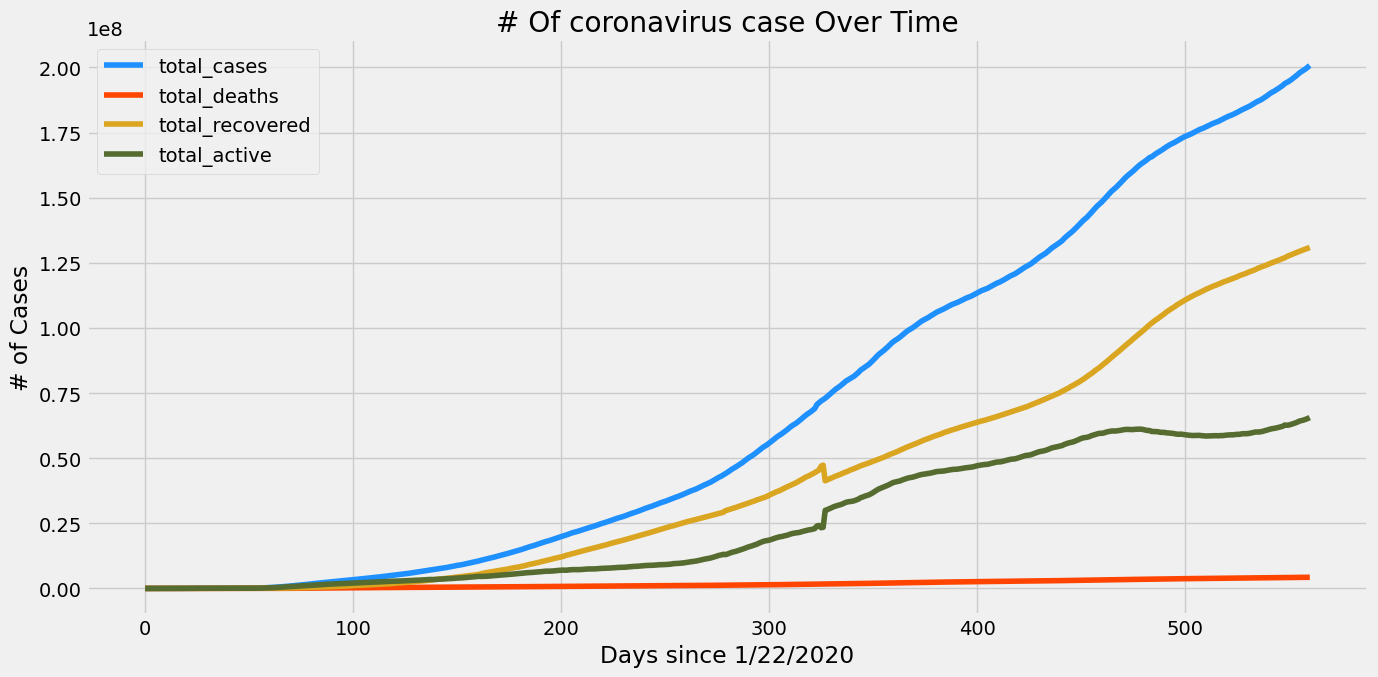

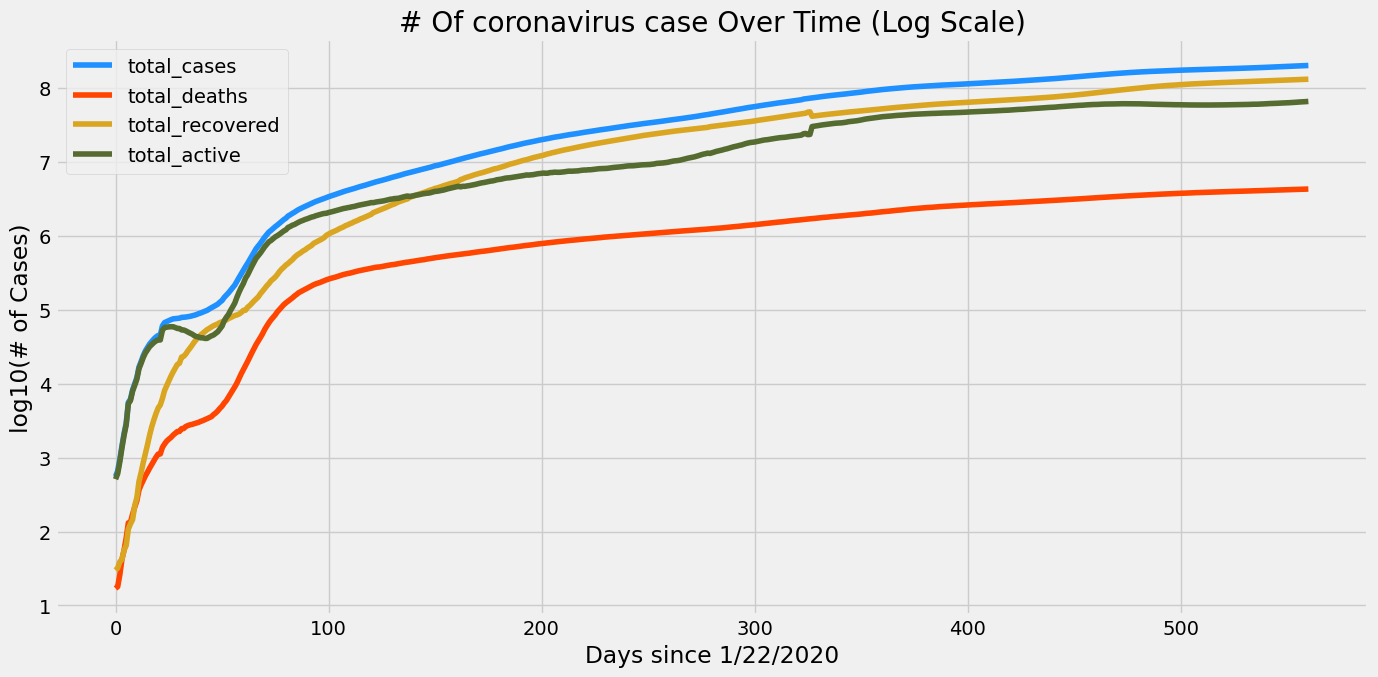

In [19]:
# Trực quan hóa số lượng tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian
plt.figure(figsize=(14, 7))
plt.plot(adjusted_dates, total_cases, color='dodgerblue')
plt.plot(adjusted_dates, total_deaths, color='orangered')
plt.plot(adjusted_dates, total_recovered, color='goldenrod')
plt.plot(adjusted_dates, total_active, color='darkolivegreen')

plt.title("# Of coronavirus case Over Time")
plt.xlabel('Days since 1/22/2020')
plt.ylabel('# of Cases')
plt.legend(['total_cases', 'total_deaths', 'total_recovered', 'total_active'])
plt.grid(True)
plt.xticks(ticks=np.arange(0, len(adjusted_dates), 100))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.tight_layout()
plt.show()

# Trực quan hóa log(10)tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian
plt.figure(figsize=(14, 7))
plt.plot(adjusted_dates, np.log10(total_cases), color='dodgerblue')
plt.plot(adjusted_dates, np.log10(total_deaths), color='orangered')
plt.plot(adjusted_dates, np.log10(total_recovered), color='goldenrod')
plt.plot(adjusted_dates, np.log10(total_active), color='darkolivegreen')

plt.title("# Of coronavirus case Over Time (Log Scale)")
plt.xlabel("Days since 1/22/2020")
plt.ylabel("log10(# of Cases)")
plt.legend(['total_cases', 'total_deaths', 'total_recovered', 'total_active'])
plt.grid(True)
plt.xticks(ticks=np.arange(0, len(adjusted_dates), 100))
plt.tight_layout()
plt.show()



## Bài toán 3
    Trực quan hóa tổng số ca bệnh, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ được phân tách bằng cách sử dụng biểu đồ đường.

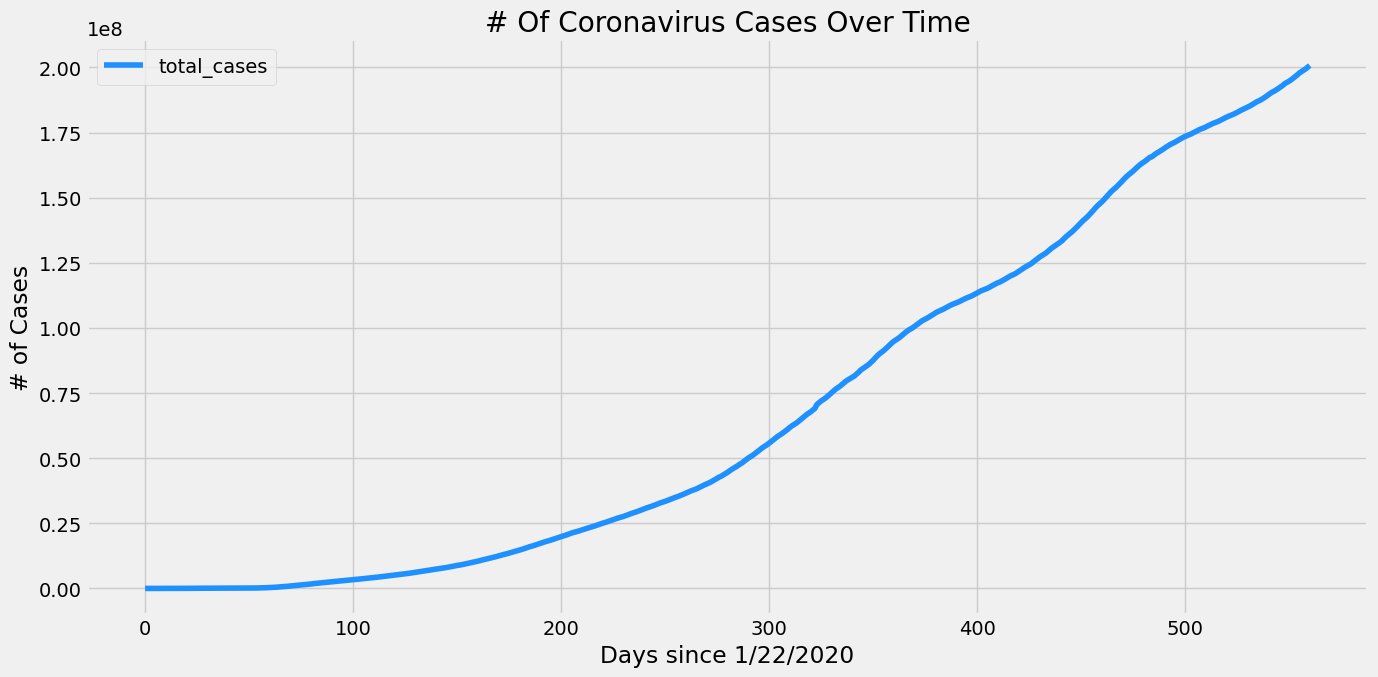

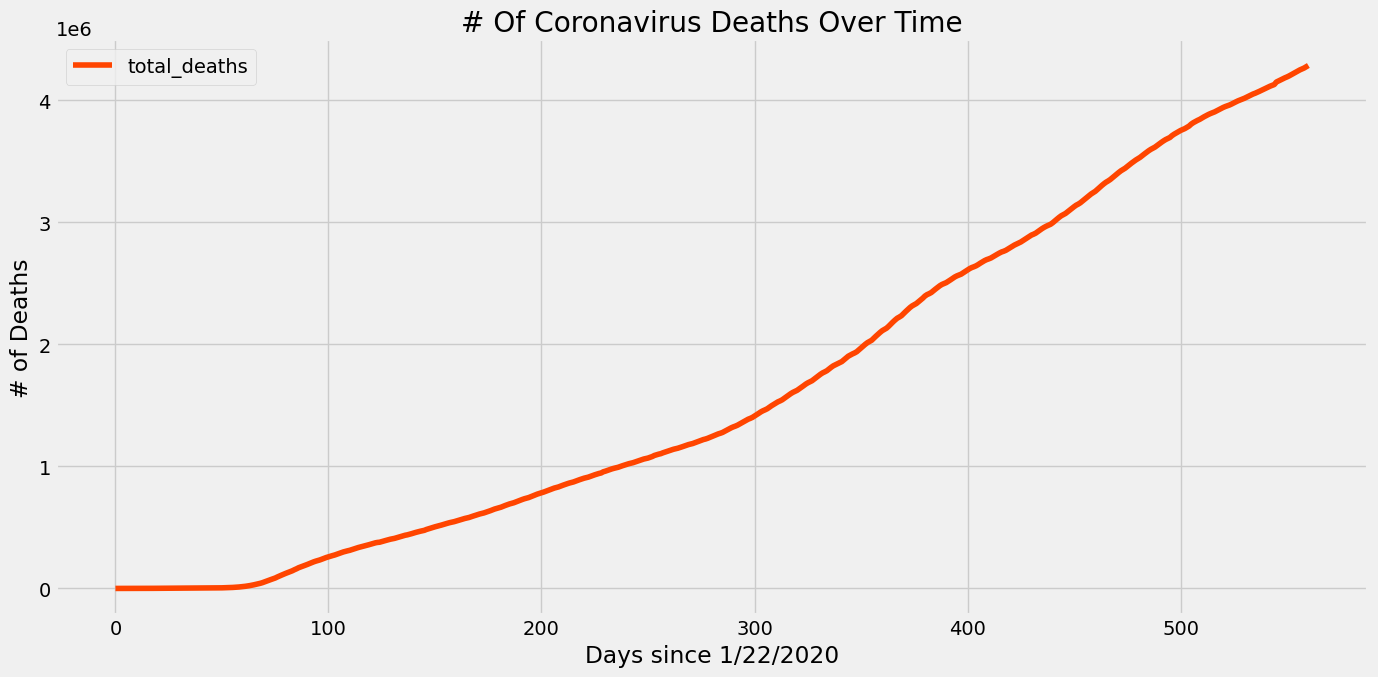

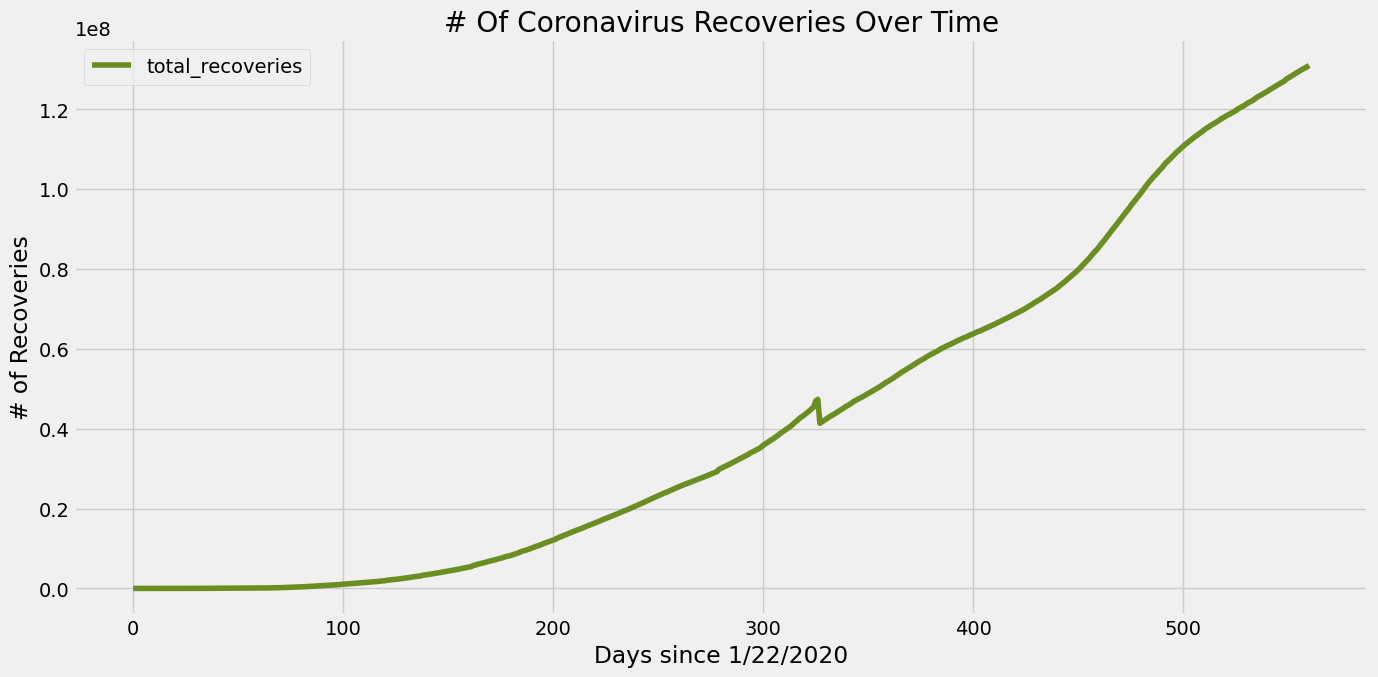

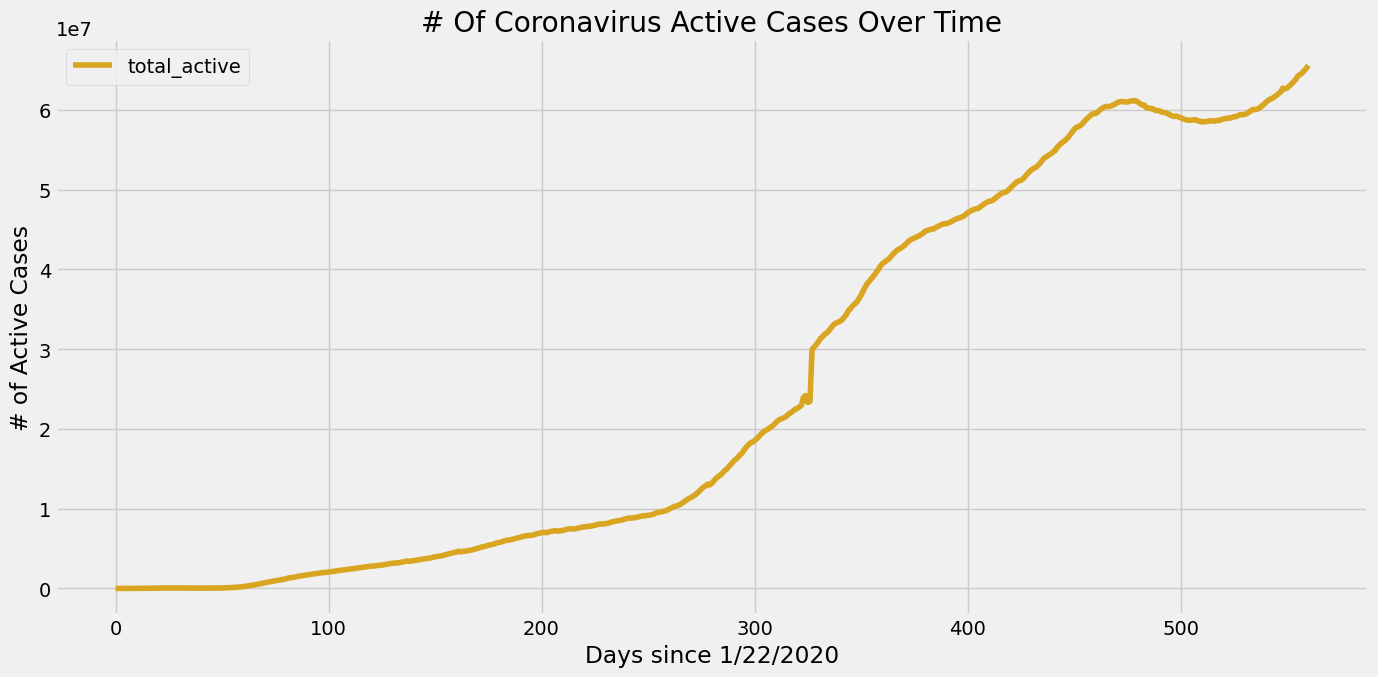

In [20]:
# 1. Tổng số ca bệnh
plt.figure(figsize=(14,7))
plt.plot(adjusted_dates, total_cases, color='dodgerblue')
plt.title('# Of Coronavirus Cases Over Time')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('# of Cases')
plt.legend(['total_cases'])
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.xticks(np.arange(0, len(adjusted_dates), 100))
plt.tight_layout()
plt.show()

# 2. Tổng số người chết
plt.figure(figsize=(14, 7))
plt.plot(adjusted_dates, total_deaths, color='orangered')
plt.title('# Of Coronavirus Deaths Over Time')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('# of Deaths')
plt.legend(['total_deaths'])
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.xticks(np.arange(0, len(adjusted_dates), 100))
plt.tight_layout()
plt.show()

# 3. Tổng số người phục hồi
plt.figure(figsize=(14, 7))
plt.plot(adjusted_dates, total_recovered, color='olivedrab')
plt.title('# Of Coronavirus Recoveries Over Time')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('# of Recoveries')
plt.legend(['total_recoveries'])
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.xticks(np.arange(0, len(adjusted_dates), 100))
plt.tight_layout()
plt.show()

# 4. Tổng số đang điều trị
plt.figure(figsize=(14, 7))
plt.plot(adjusted_dates, total_active, color='goldenrod')
plt.title('# Of Coronavirus Active Cases Over Time')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('# of Active Cases')
plt.legend(['total_active'])
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.xticks(np.arange(0, len(adjusted_dates), 100))
plt.tight_layout()
plt.show()


## Bài toán 4
    Tính toán số lượng gia tăng hàng ngày trong tổng số trường hợp, tổng số người chết, tổng số người hồi phục và tổng số đang điều trị theo thời gian (đơn vị ngày).

In [21]:
new_cases = pd.Series(total_cases).diff().fillna(0).values
new_deaths = pd.Series(total_deaths).diff().fillna(0).values
new_recoveries = pd.Series(total_recovered).diff().fillna(0).values
new_active = pd.Series(total_active).diff().fillna(0).values


## Bài toán 5
    Trực quan hóa số lượng gia tăng hàng ngày về tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ riêng biệt bằng cách sử dụng biểu đồ cột.

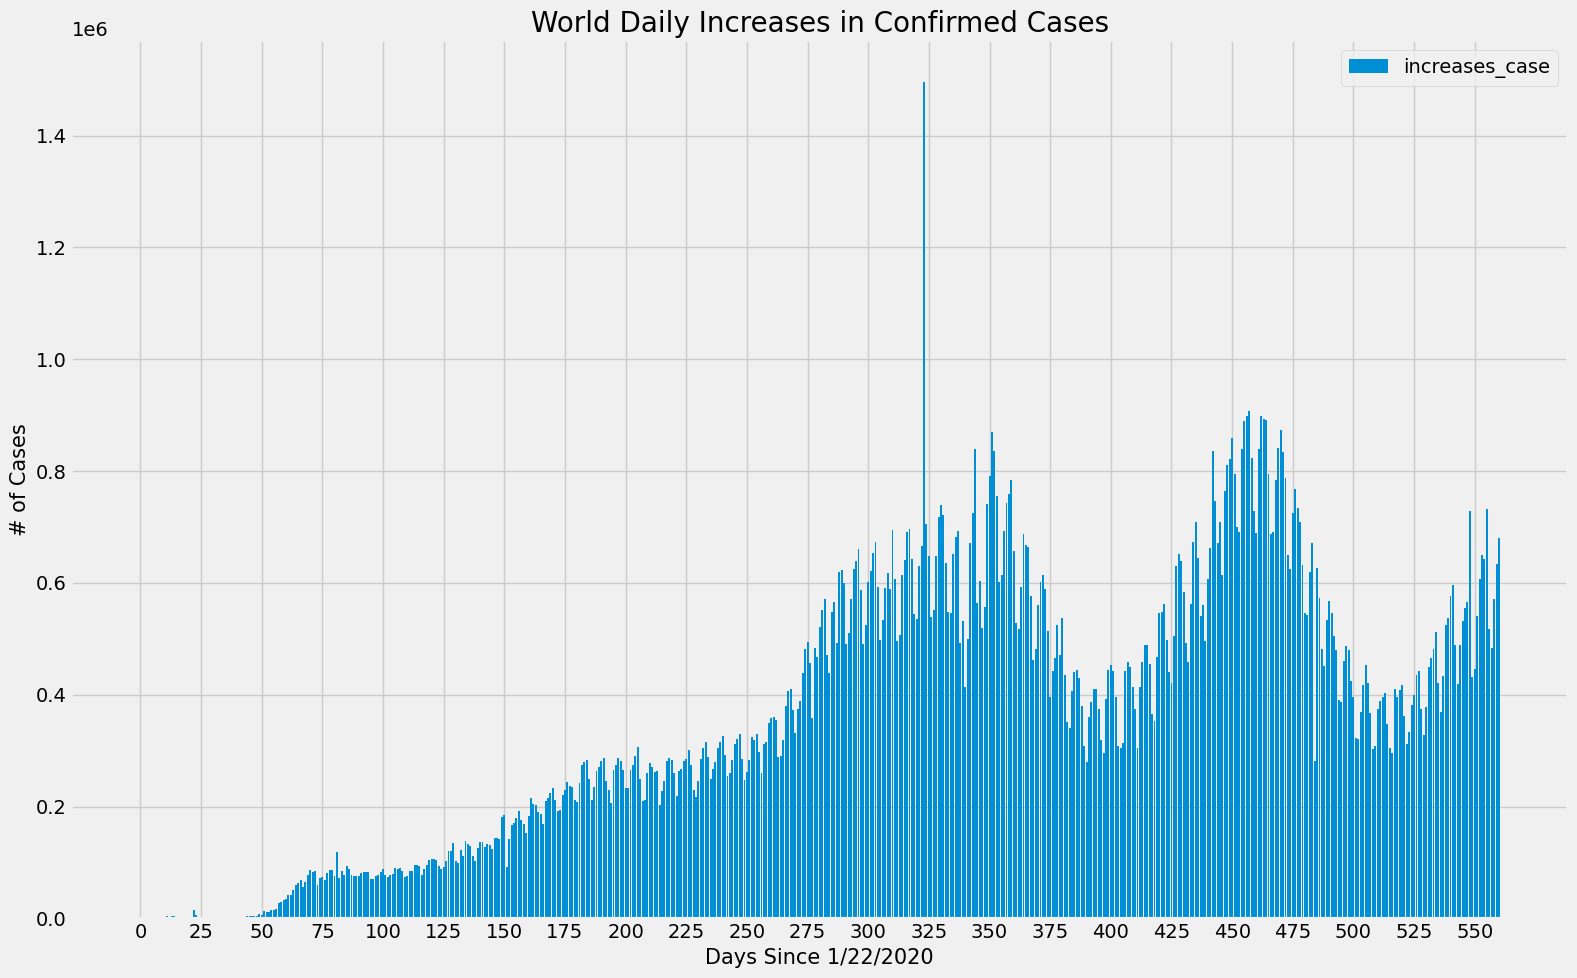

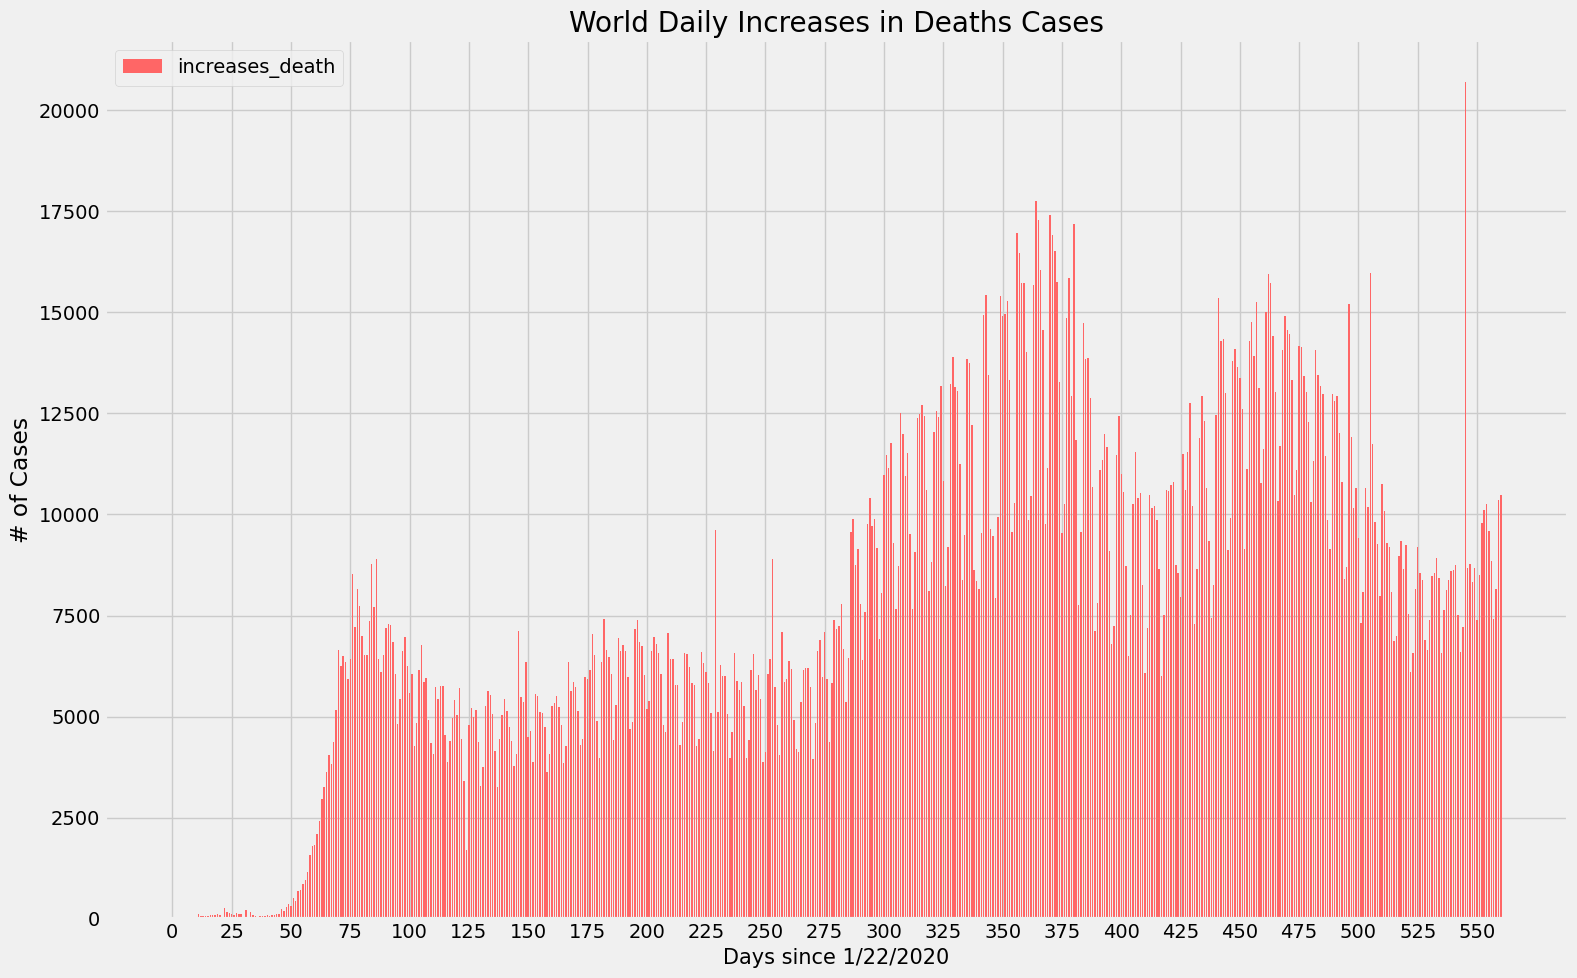

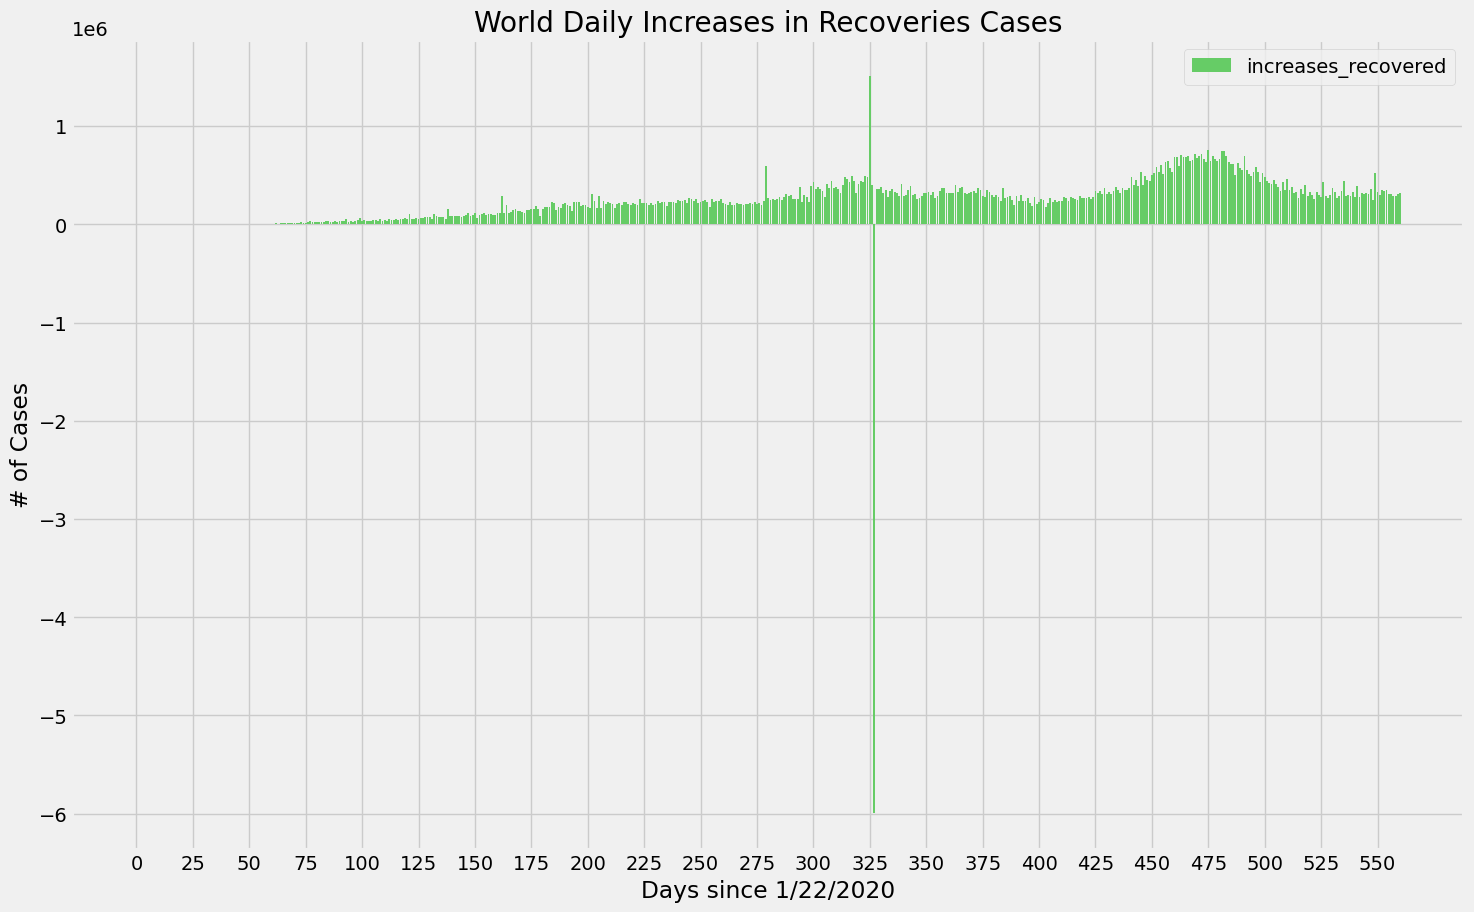

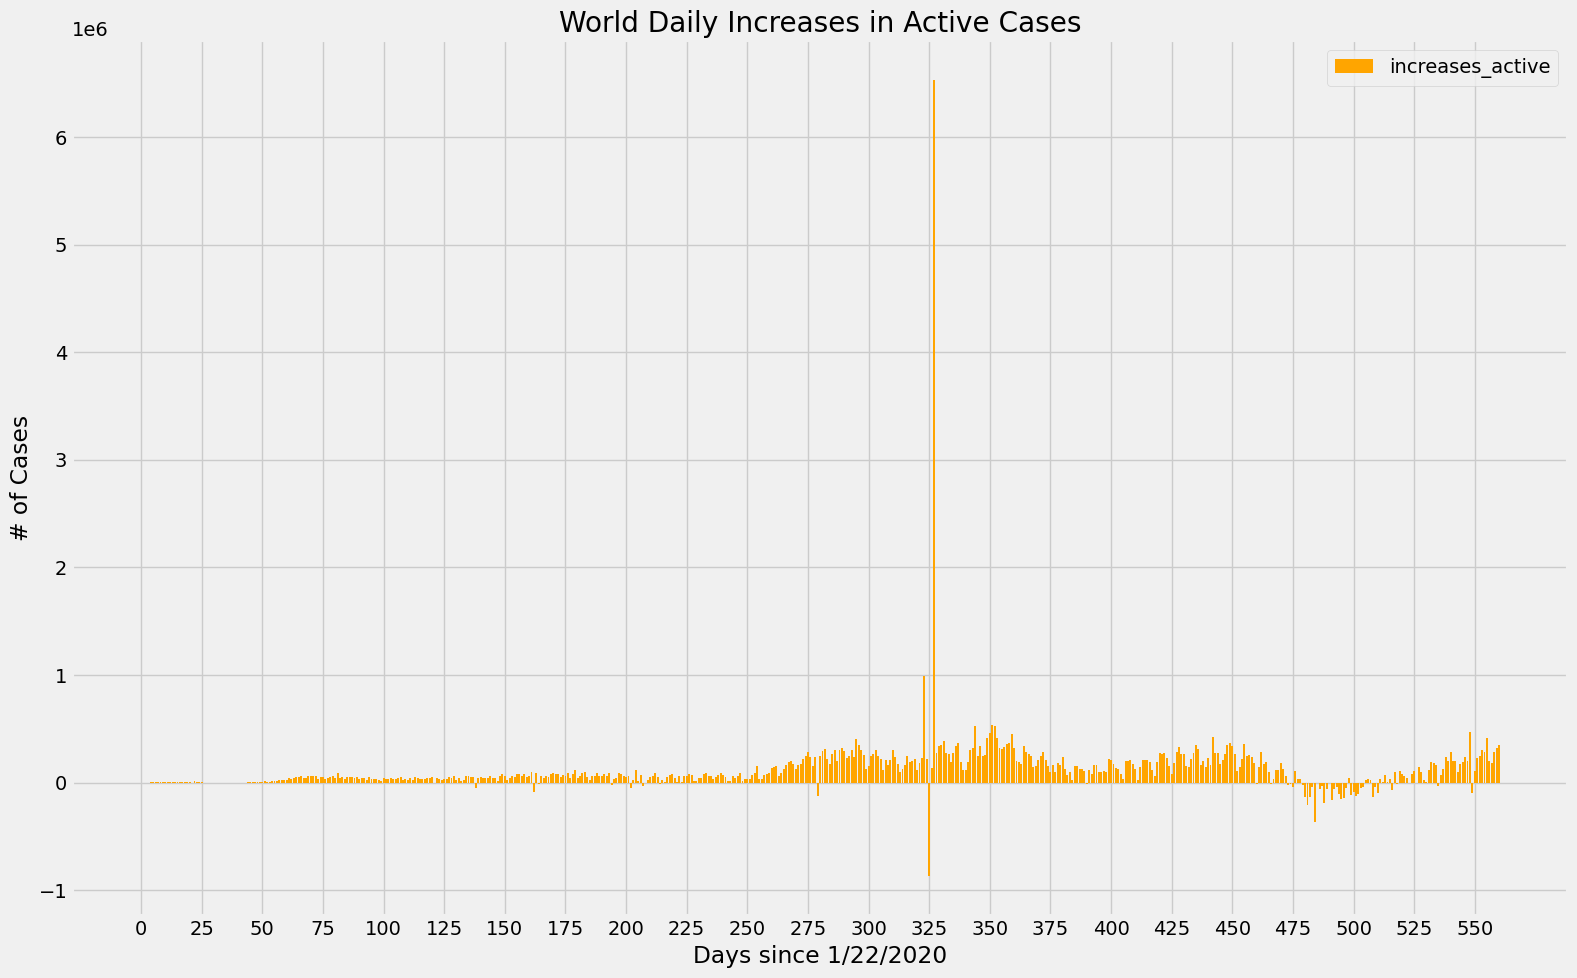

In [22]:
# Cases
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, new_cases)
plt.xlabel('Days Since 1/22/2020', fontsize=15)
plt.ylabel('# of Cases', fontsize=15)
plt.title('World Daily Increases in Confirmed Cases', fontsize=20)
plt.xticks(ticks=range(0, len(adjusted_dates), 25))
plt.legend(['increases_case'])
plt.tight_layout()
plt.show()

# Deaths
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, new_deaths, color='#ff6666', width=0.6)
plt.title("World Daily Increases in Deaths Cases")
plt.xlabel("Days since 1/22/2020", fontsize=15)
plt.ylabel("# of Cases")
plt.xticks(ticks=range(0, len(adjusted_dates), 25))
plt.legend(['increases_death'])
plt.tight_layout()
plt.show()

# Recoveries
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, new_recoveries, color='#66cc66')
plt.title("World Daily Increases in Recoveries Cases")
plt.xlabel("Days since 1/22/2020")
plt.ylabel("# of Cases")
plt.xticks(ticks=range(0, len(adjusted_dates), 25))
plt.legend(['increases_recovered'])
plt.show()

# Active
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, new_active, color='#ffa500')
plt.title("World Daily Increases in Active Cases")
plt.xlabel("Days since 1/22/2020")
plt.ylabel("# of Cases")
plt.xticks(ticks=range(0, len(adjusted_dates), 25))
plt.legend(['increases_active'])
plt.tight_layout()
plt.show()



# Bài toán 6:
    Tính tỷ lệ tử vong toàn cầu và tỷ lệ hồi phục theo phần trăm theo thời gian.

In [23]:
mortality_rate = []
recovery_rate = []

for i in range(len(total_cases)):
    if total_cases[i] == 0:
        continue
    mortality = round((total_deaths[i] / total_cases[i]) * 100, 2)
    recovery = round((total_recovered[i] / total_cases[i]) * 100, 2)

    mortality_rate.append(mortality)
    recovery_rate.append(recovery)


# Bài toán 7
**7.1**

    Trực quan hóa tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

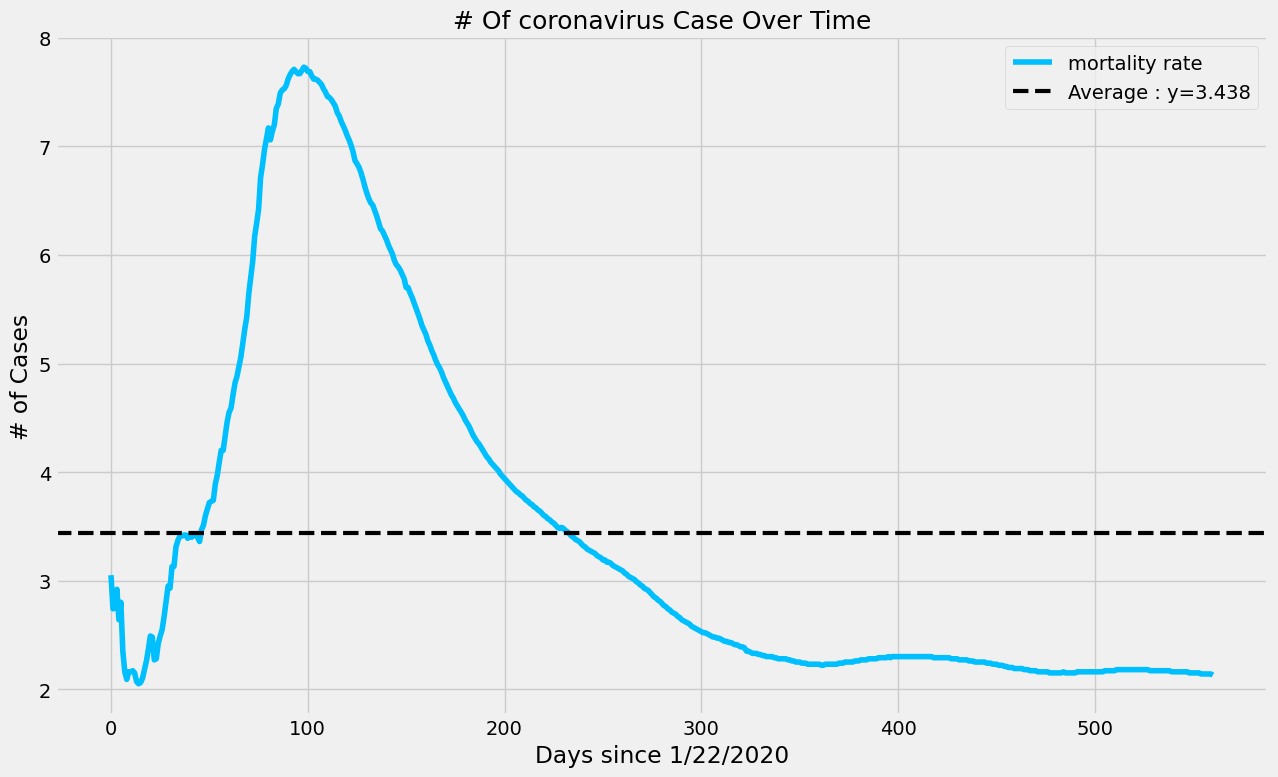

In [24]:
mortality_avg = round(np.mean(mortality_rate[:len(adjusted_dates)]), 3)

plt.figure(figsize=(13, 8))
plt.plot(adjusted_dates, mortality_rate[:len(adjusted_dates)], color='deepskyblue', linewidth=4)
plt.axhline(y=mortality_avg, color='black', linestyle='--', linewidth=3)
plt.legend(['mortality rate', 'Average : y={:.3f}'.format(mortality_avg)])

plt.title("# Of coronavirus Case Over Time", fontsize=18)
plt.xlabel("Days since 1/22/2020")
plt.ylabel("# of Cases")
plt.grid(True)
plt.xticks(ticks=np.arange(0, len(adjusted_dates), 100))
plt.tight_layout()
plt.show()




**7.2**

    Trực quan hóa tỷ lệ phục hồi theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

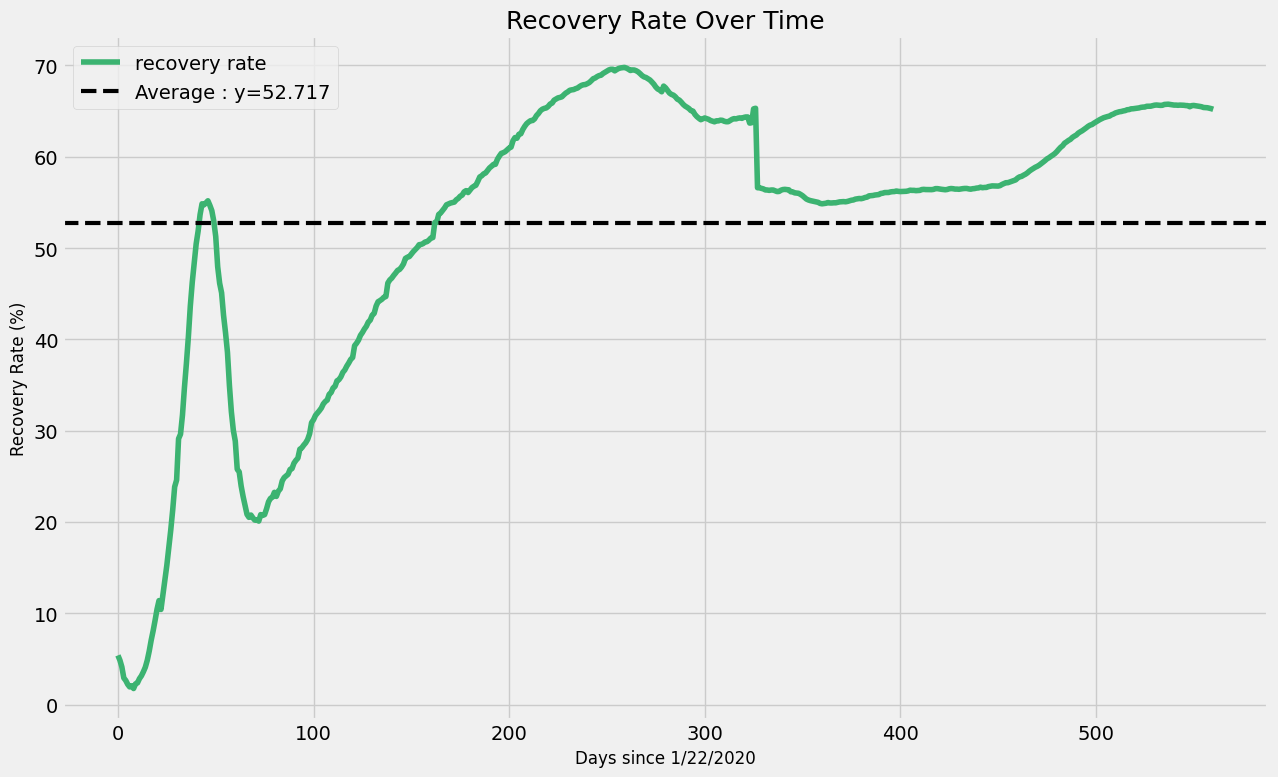

In [25]:
recovery_avg = round(np.mean(recovery_rate[:len(adjusted_dates)]), 3)

plt.figure(figsize=(13, 8))
plt.plot(adjusted_dates, recovery_rate[:len(adjusted_dates)], color='mediumseagreen', linewidth=4)
plt.axhline(y=recovery_avg, color='black', linestyle='--', linewidth=3)
plt.legend(['recovery rate', 'Average : y={:.3f}'.format(recovery_avg)])

plt.title("Recovery Rate Over Time", fontsize=18)
plt.xlabel("Days since 1/22/2020", fontsize=12)
plt.ylabel("Recovery Rate (%)", fontsize=12)
plt.grid(True)
plt.xticks(np.arange(0, len(adjusted_dates), 100))
plt.tight_layout()
plt.show()



#  5. Phân tích theo lục địa

## Tiền xử lý dữ liệu

In [26]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America',
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Bài toán 8
    Thêm trường "continent" vào tập dữ liệu confirm_df, death_df và recorveries_df:

In [27]:
# Áp dụng hàm để thêm cột continent_code
confirmed_df['continent'] = confirmed_df['Country/Region'].apply(lambda x: country_to_continent_code(x))
deaths_df['continent'] = deaths_df['Country/Region'].apply(lambda x: country_to_continent_code(x))
recoveries_df['continent'] = recoveries_df['Country/Region'].apply(lambda x: country_to_continent_code(x))

# Áp dụng mapping từ mã lục địa sang tên lục địa
confirmed_df['continent'] = confirmed_df['continent'].map(continents)
deaths_df['continent'] = deaths_df['continent'].map(continents)
recoveries_df['continent'] = recoveries_df['continent'].map(continents)

# Đưa cột 'continent' về sau 'Country/Region'
confirmed_df.insert(2, 'continent', confirmed_df.pop('continent'))
deaths_df.insert(2, 'continent', deaths_df.pop('continent'))
recoveries_df.insert(2, 'continent', recoveries_df.pop('continent'))

recoveries_df.head()


,Province/State,Country/Region,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,Asia,33.93911,67.709953,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,Europe,41.15330,20.168300,0,0,0,0,0,...,130152,130166,130174,130187,130205,130222,130243,130256,130291,130314
2,NaN,Algeria,Africa,28.03390,1.659600,0,0,0,0,0,...,111322,112050,112900,113707,114531,115276,116009,116770,117557,118409
3,NaN,Andorra,Europe,42.50630,1.521800,0,0,0,0,0,...,14077,14113,14113,14180,14210,14210,14210,14296,14348,14380
4,NaN,Angola,Africa,-11.20270,17.873900,0,0,0,0,0,...,35686,35742,35964,36025,36708,37255,37397,38360,39389,39582


# Bài toán 9
    Tạo khung dữ liệu country_df với chỉ mục là trường "Country/Region".
    Các thông tin cột này sẽ là:
    - continent: Lục địa của quốc gia.
    - Deaths: Tổng số ca dương tính.
    - Deaths: Tổng số người chết.
    - Recoveries: Tổng số ca hồi phục
    - Active: Tổng số đang điều trị.
    - Mortality Rate: Tỉ lệ tử vong tính theo phần trăm.

In [30]:
# Tạo DataFrame country_df
country_df = pd.DataFrame(index=countries)

# Thêm continent theo tên
country_df["continent"] = country_df.index.map(lambda x: continents.get(country_to_continent_code(x), 'Others'))

#Tạo các cột còn lại
country_df["Confirmed"] = country_df.index.map(confirmed_df.groupby("Country/Region")['8/4/21'].sum())
country_df["Recoveries"] = country_df.index.map(recoveries_df.groupby("Country/Region")['8/4/21'].sum())
country_df["Deaths"] = country_df.index.map(deaths_df.groupby("Country/Region")['8/4/21'].sum())
country_df["Active"] = country_df["Confirmed"] - country_df["Deaths"] - country_df["Recoveries"]
country_df["Mortality Rate"] = round(country_df["Deaths"] / country_df["Confirmed"] * 100, 2)
country_df = country_df[["continent", "Confirmed", "Recoveries", "Deaths", "Active", "Mortality Rate"]]
#Hiển thị kết quả
country_df.index.name = "Country/Region"
country_df.head()


,continent,Confirmed,Recoveries,Deaths,Active,Mortality Rate
Country/Region,,,,,,
Afghanistan,Asia,148933,82586,6836,59511,4.59
Albania,Europe,133310,130314,2457,539,1.84
Algeria,Africa,176724,118409,4404,53911,2.49
Andorra,Europe,14797,14380,128,289,0.87
Angola,Africa,43158,39582,1026,2550,2.38


# Bài toán 10
    Tạo khung dữ liệu Continental_df với chỉ mục là trường "continent".
    Các thông tin cột này sẽ là:

     - Confirmed: Đất nước lục địa.
     - Deaths: Tổng số người chết.
     - Recoveries: Tổng số lần khôi phục.
     - Active: Tổng số đang điều trị.
     - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [31]:
# Gom nhóm theo 'continent' và tính tổng cho từng biến
confirmed_by_cont = confirmed_df.groupby("continent")['8/4/21'].sum()
deaths_by_cont = deaths_df.groupby("continent")['8/4/21'].sum()
recoveries_by_cont = recoveries_df.groupby("continent")['8/4/21'].sum()

# Tạo DataFrame mới từ 3 Series trên
Continental_df = pd.DataFrame({
    "Confirmed": confirmed_by_cont,
    "Deaths": deaths_by_cont,
    "Recoveries": recoveries_by_cont
})

# Tính số ca đang điều trị
Continental_df["Active"] = Continental_df["Confirmed"] - Continental_df["Deaths"] - Continental_df["Recoveries"]

# Tính tỷ lệ tử vong (%)
Continental_df["Mortality Rate"] = round(Continental_df["Deaths"] / Continental_df["Confirmed"] * 100, 2)

# Sắp xếp các cột
Continental_df = Continental_df[["Confirmed", "Deaths", "Recoveries", "Active", "Mortality Rate"]]

Continental_df.head()


,Confirmed,Deaths,Recoveries,Active,Mortality Rate
continent,,,,,
Africa,6855602,174000,5955131,726471,2.54
Asia,62536726,902952,57853343,3780431,1.44
Australia,90000,1425,55290,33285,1.58
Europe,52448545,1167140,27947075,23334330,2.23
North America,42351963,924518,5776939,35650506,2.18


## Biểu đồ đường mẫu
Dưới đây là các hàm mẫu để trực quan hóa các trường hợp sinh động theo thời gian ở mỗi châu lục / quốc gia:

In [32]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')

    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})

    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)

def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)

    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else:
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]

    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"

    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]

    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)

    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})

    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)

    if figure == None:
        plt.show()



# Bài toán 11
**11.1**

  Áp dụng hàm visual_covid_case để hiển thị trực quan hóa về Covid của 7 lục địa trong 7 biểu đồ đường được riêng biệt. Thứ tự hiển thị được sắp xếp theo thứ tự giảm dần theo số ca được xác nhận.
    

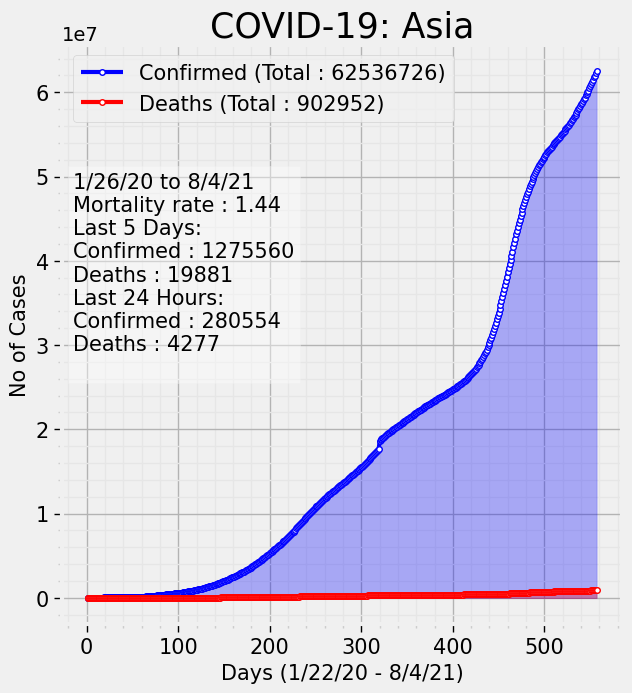

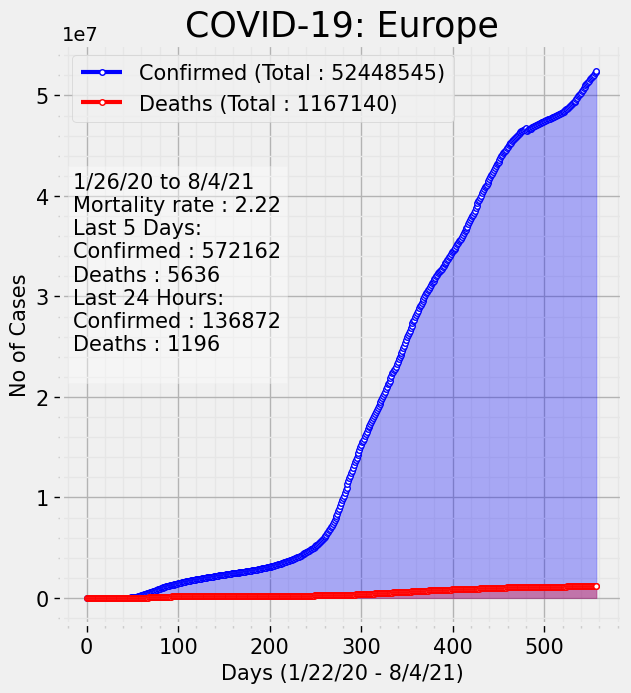

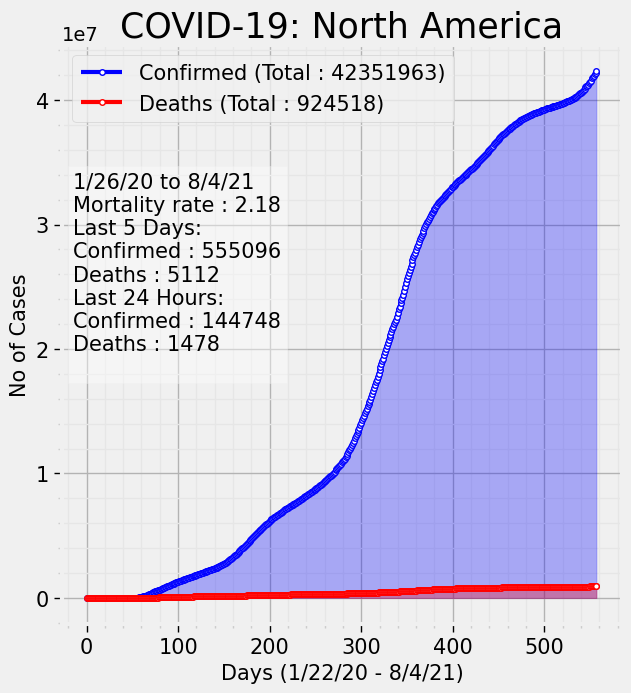

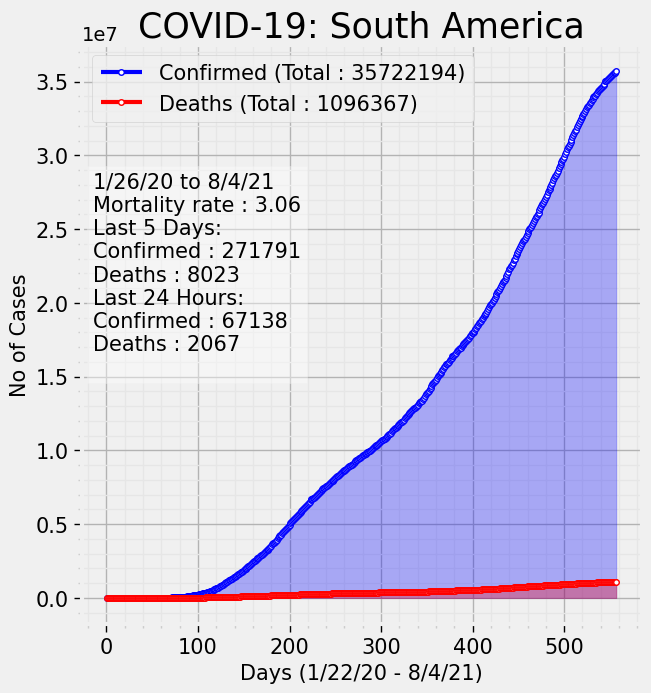

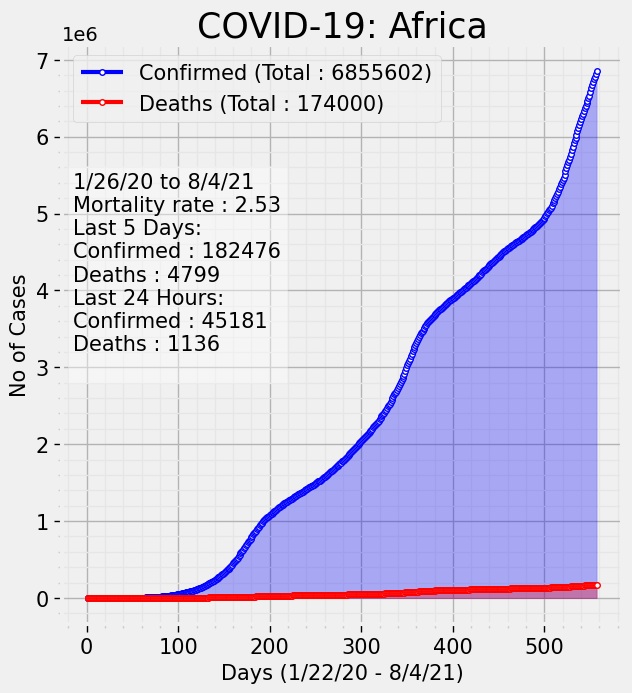

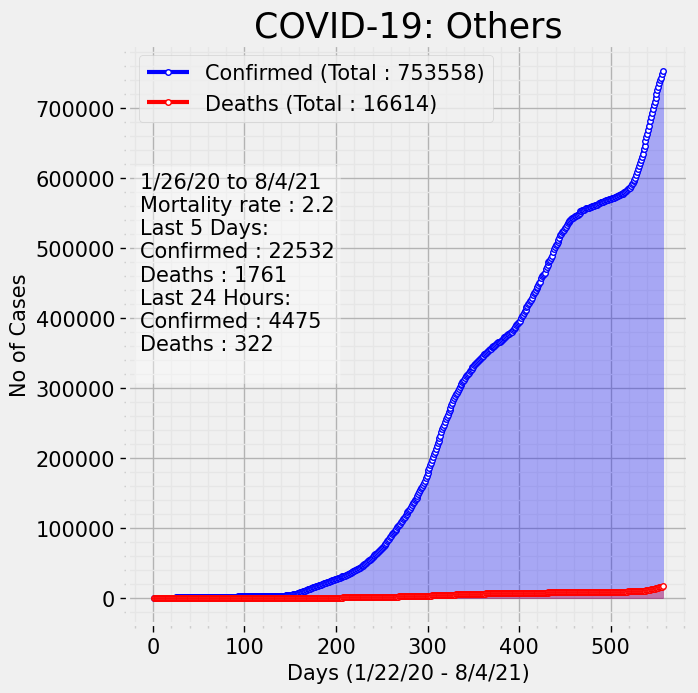

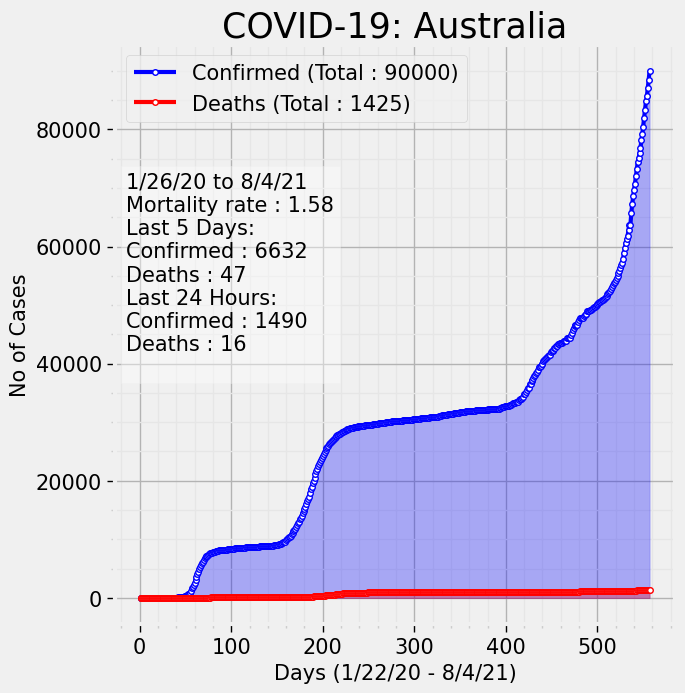

In [33]:
# Sắp xếp dataframe theo thứ tự giảm dần theo số ca được xác nhận
Continental_df = Continental_df.sort_values(by='Confirmed', ascending=False)

# Nhóm dữ liệu theo cột continent
grouped_confirmed = confirmed_df.groupby('continent')
grouped_deaths = deaths_df.groupby('continent')

# Tính tổng của các cột trong mỗi nhóm
confirmed_df_continent = grouped_confirmed[cols[4:]].sum()
deaths_df_continent = grouped_deaths[cols[4:]].sum()

for i in range(7):
    ctn = Continental_df.index[i]

    # Chuyển đổi confirmed_df_continent và deaths_df_continent thành DataFrame với cột 'continent'
    ctn_confirmed = confirmed_df_continent.loc[[ctn]].reset_index()
    ctn_deaths = deaths_df_continent.loc[[ctn]].reset_index()

    visualize_covid_cases(ctn_confirmed, ctn_deaths, continent=ctn)

    plt.show()


**11.2**

    Sử đổi "plot_params" và hàm "visualize_covid_cases" để:
    - Hiển thị kết quả của 7 ngày gần nhất thay vì 5 ngày.
     - Thêm "Recoveries line" vào biểu đồ chính.
     - Thêm số "Total Recoveries" vào bảng nhỏ.
     - Thêm "Recoveries" được nộp trong 7 ngày và 24 giờ qua vào menu thông tin.

In [34]:
def visualize_covid_cases(confirmed, deaths, recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)

    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths", "Recoveries"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')

    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else:
        params = ["All", "All"]

    for i, stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date, cases, label = f"{label[i]} (Total : {int(cases[-1])})", color=color[i], **marker_style)
        plt.fill_between(date, cases, color=color[i], alpha=0.3)

    # Tính toán tổng theo chuỗi thời gian
    if params[1] == "All" :
        total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else:
        total_confirmed = np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]

    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    mortality = int(total_deaths[-1]/(total_confirmed[-1])*10000)/100
    text += f"Mortality rate : {mortality}\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(total_confirmed[-1] - total_confirmed[-8]) + "\n"
    text += "Deaths : " + str(total_deaths[-1] - total_deaths[-8]) + "\n"
    text += "Recoveries : " + str(total_recoveries[-1] - total_recoveries[-8]) + "\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(total_confirmed[-1] - total_confirmed[-2]) + "\n"
    text += "Deaths : " + str(total_deaths[-1] - total_deaths[-2]) + "\n"
    text += "Recoveries : " + str(total_recoveries[-1] - total_recoveries[-2]) + "\n"

    plt.text(0.02, 0.75, text, fontsize=15, horizontalalignment='left',
             verticalalignment='top', transform=ax.transAxes,
             bbox=dict(facecolor='white', alpha=0.4))

    axis_label = ["Days ("+confirmed.columns[5]+" - "+confirmed.columns[-1]+")","No of Cases"]
    plot_params(ax, axis_label, scale=scale)

    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:
        plt.title("COVID-19: "+params[1],{'fontsize':25})

    plt.legend(loc="best", fontsize=15)

    if figure == None:
        plt.show()


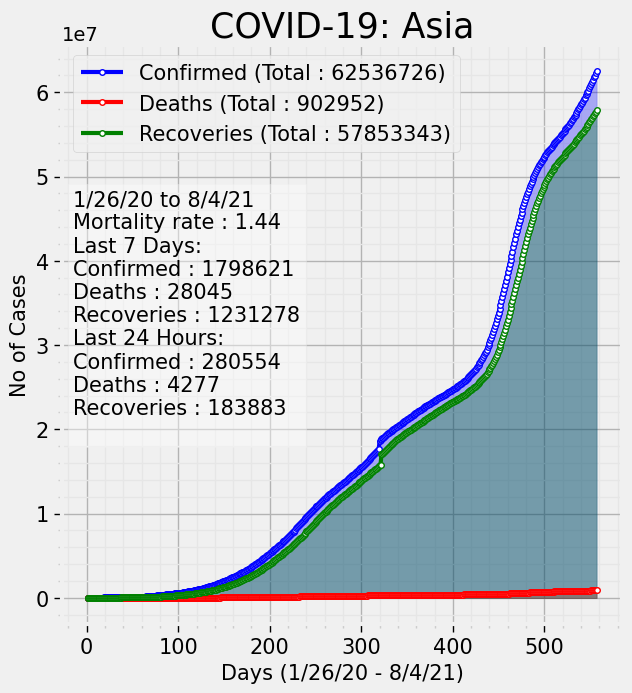

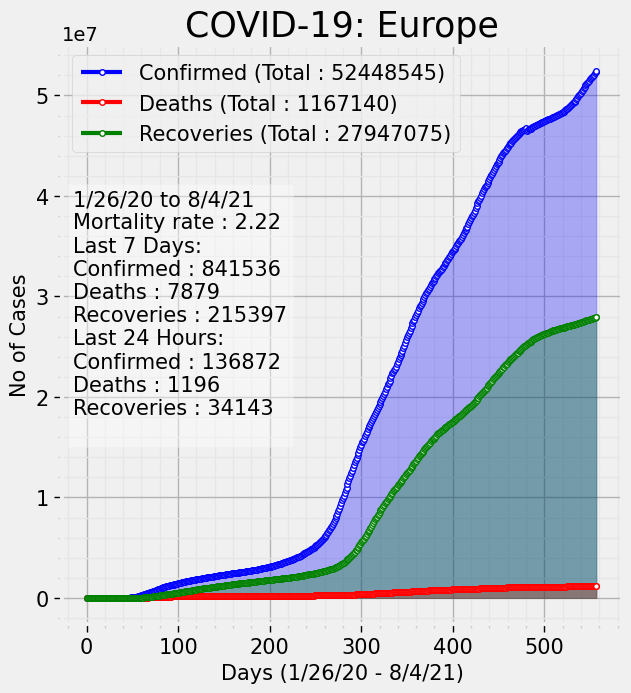

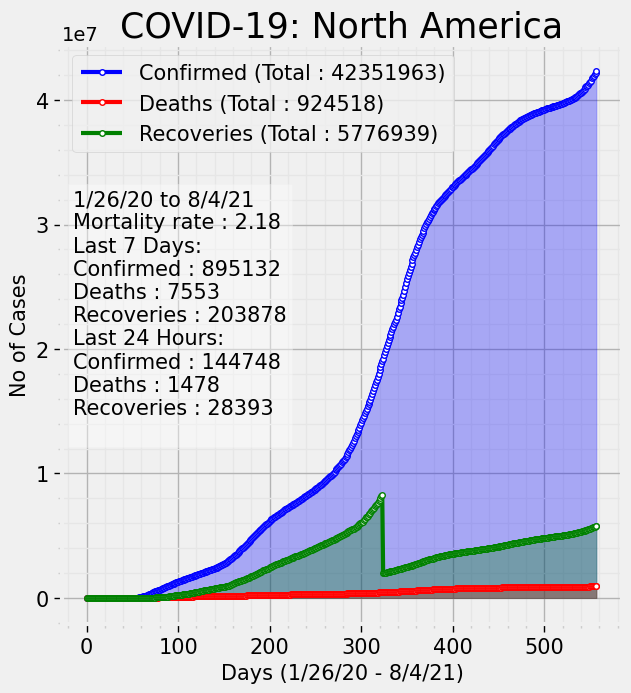

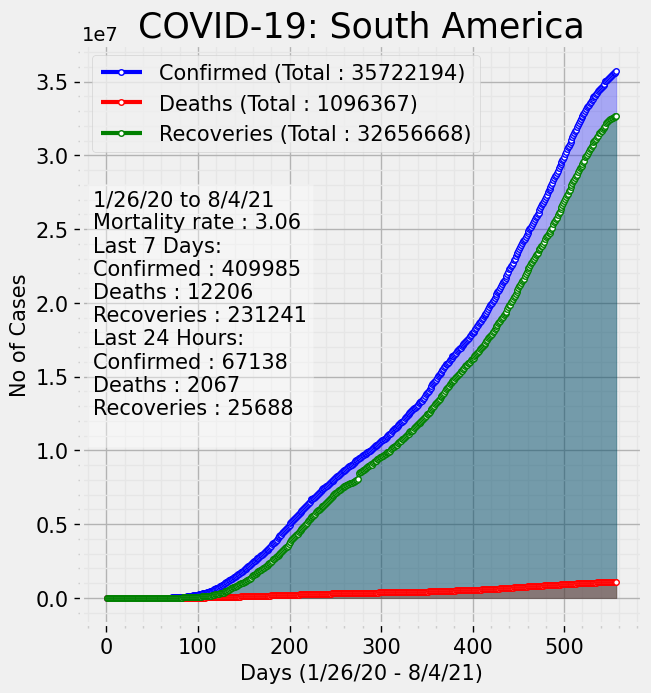

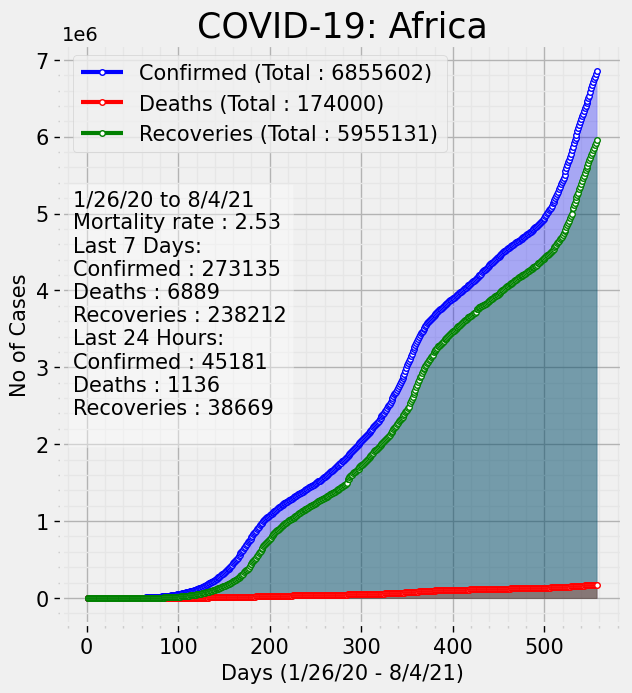

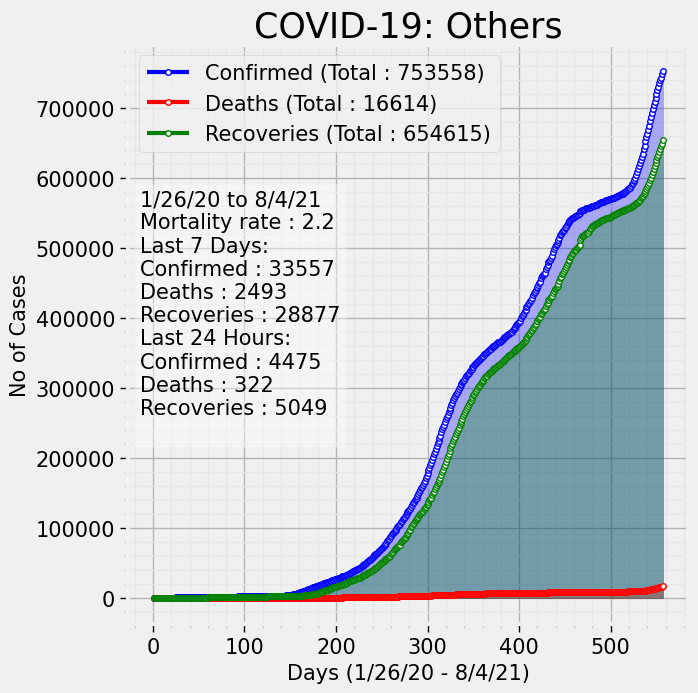

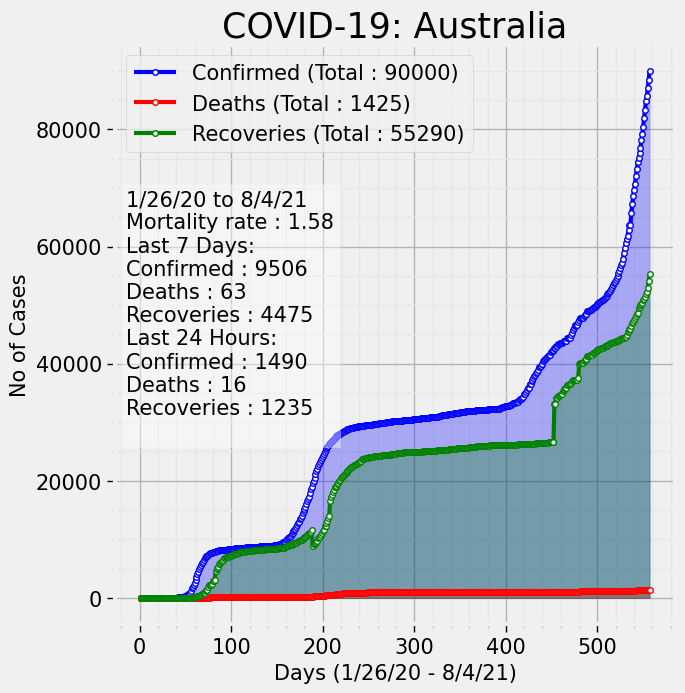

In [35]:

# Sắp xếp dữ liệu khung theo thứ tự giảm dần theo số ca được xác nhận
Continental_df = Continental_df.sort_values(by='Confirmed', ascending=False)

# Nhóm dữ liệu theo cột continent
grouped_confirmed = confirmed_df.groupby('continent')
grouped_deaths = deaths_df.groupby('continent')
grouped_recoveries = recoveries_df.groupby('continent')

# Tính tổng của các cột trong mỗi nhóm
confirmed_df_continent = grouped_confirmed[cols[4:]].sum()
deaths_df_continent = grouped_deaths[cols[4:]].sum()
recoveries_df_continent = grouped_recoveries[cols[4:]].sum()


for i in range(7):
    ctn = Continental_df.index[i]

    ctn_confirmed = confirmed_df_continent.loc[[ctn]].reset_index()
    ctn_deaths = deaths_df_continent.loc[[ctn]].reset_index()
    ctn_recoveries = recoveries_df_continent.loc[[ctn]].reset_index()

    visualize_covid_cases(ctn_confirmed, ctn_deaths, ctn_recoveries, continent=ctn)



# Bài toán 12
    Trực quan hóa ma trận tương quan của continents_df.

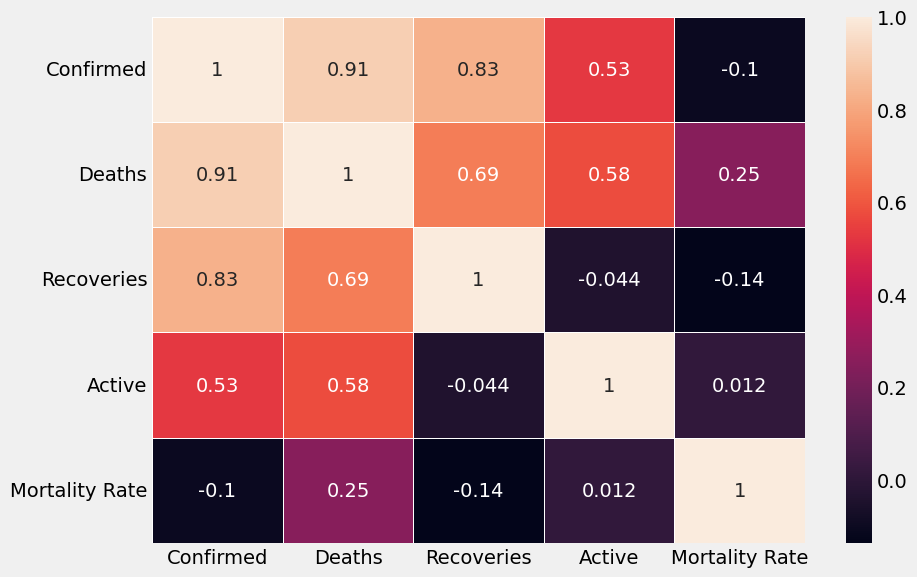

In [36]:

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = Continental_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="rocket", linewidths=0.5)

plt.tight_layout()
plt.show()


# Bài toán 13
    Xây dựng biểu đồ hình tròn để so sánh tỷ lệ số ca dương tính, số người chết, số người khỏi bệnh và đang điều trị của 7 lục địa.
    Mỗi trường (xác nhận, tử vong, ...) nên được trình bày trong các biểu đồ hình tròn khác nhau.
    Bạn không được phép sử dụng đoạn mã lặp lại ở đây, hãy thử sử dụng vòng lặp for.
    Mỗi lục địa nên được trình bày bằng các màu sắc khác nhau.

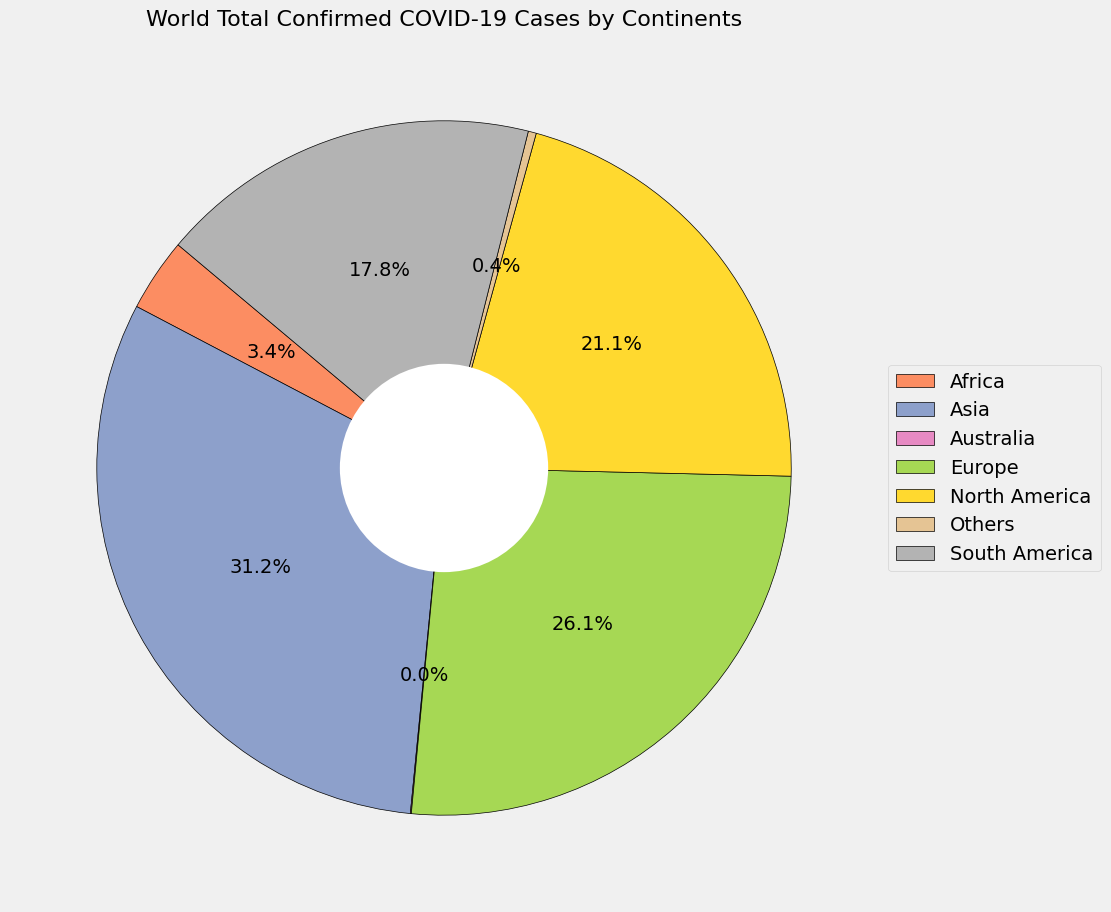

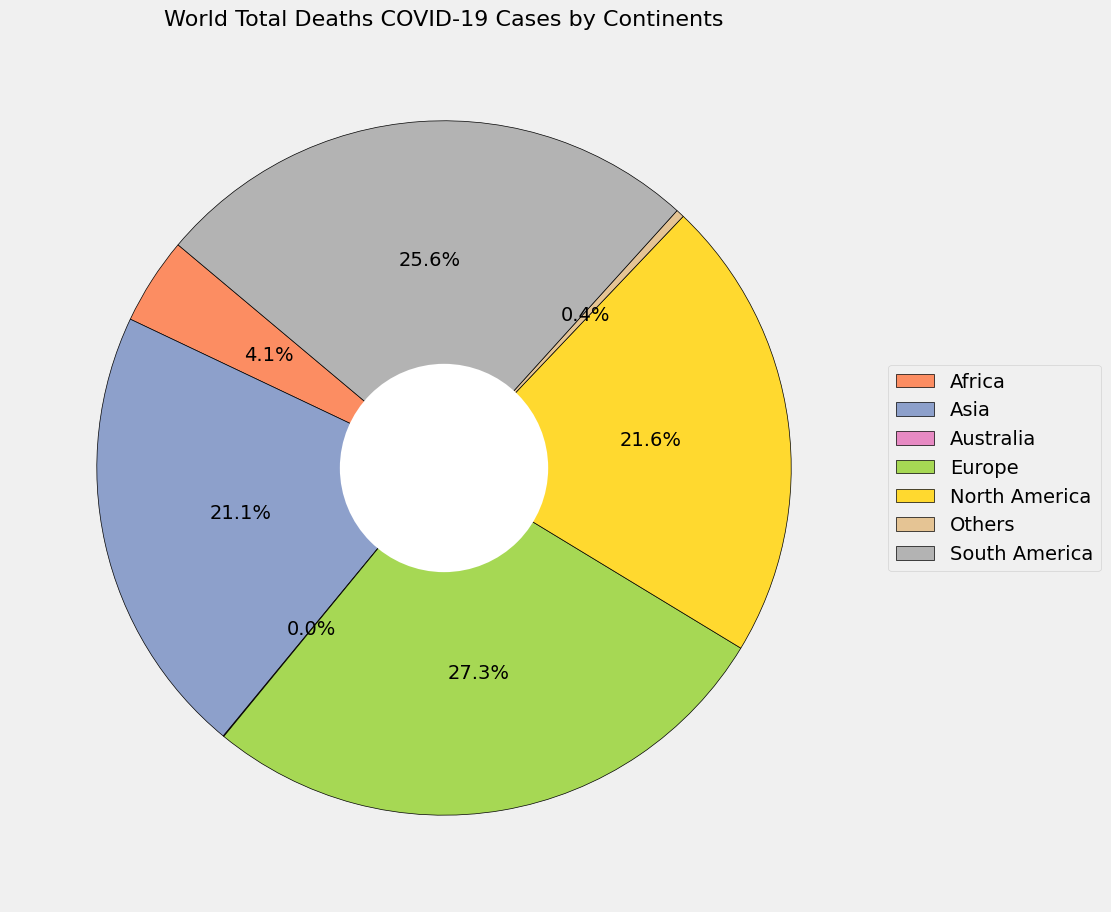

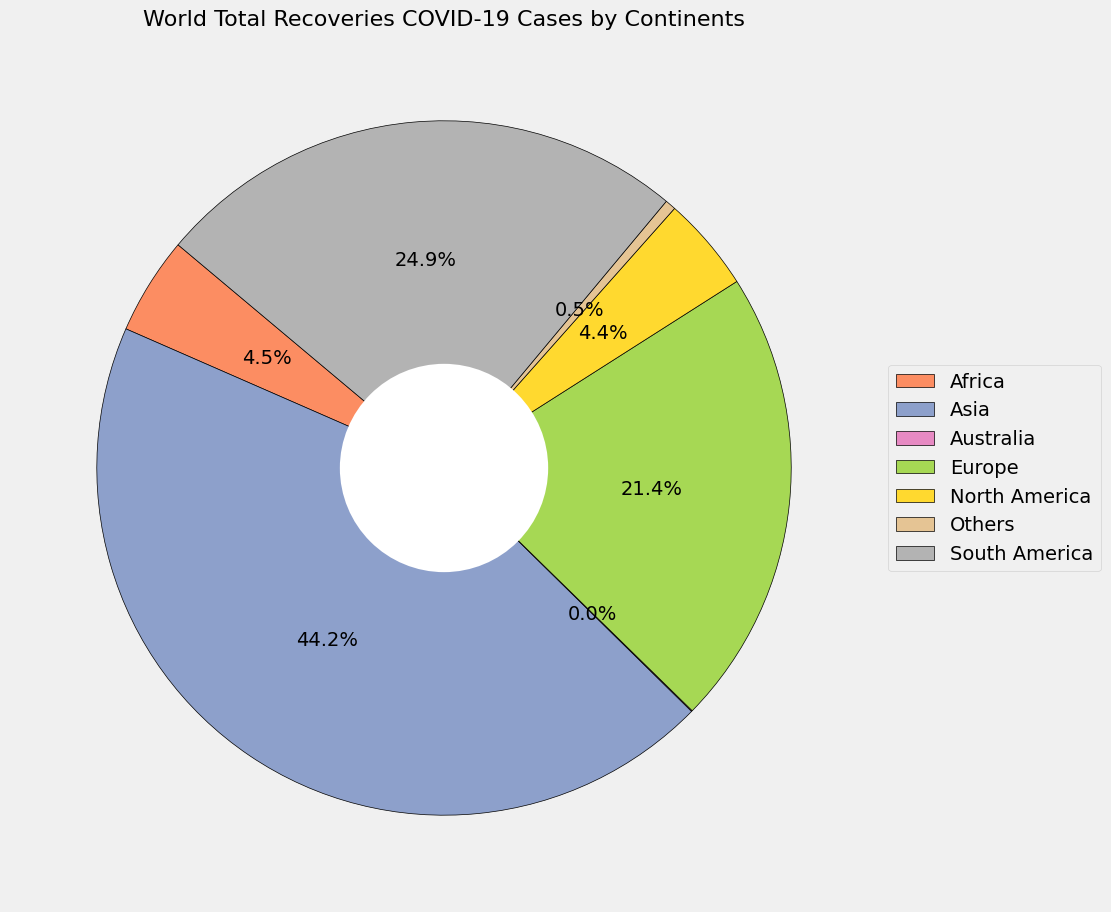

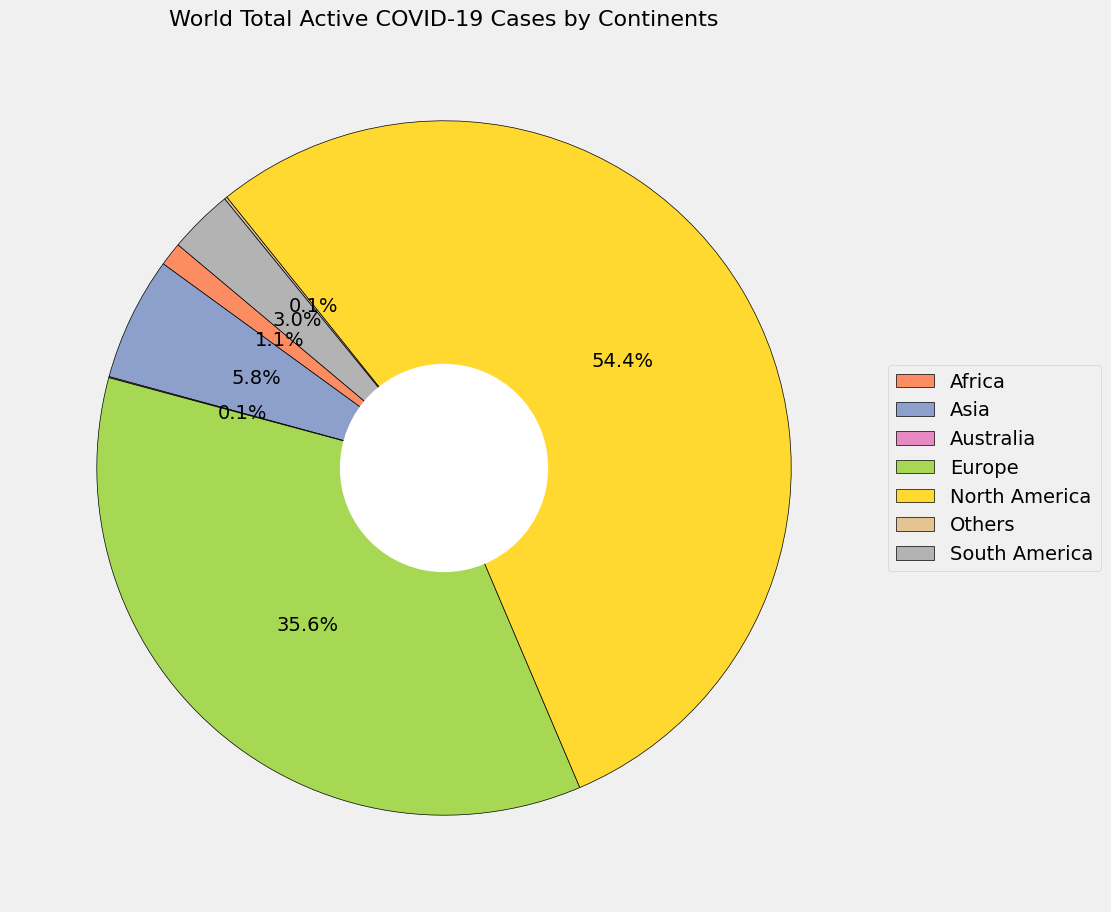

In [37]:
fields = ["Confirmed", "Deaths", "Recoveries", "Active"]

Continental_df = Continental_df.sort_index()
continents = Continental_df.index.tolist()
for field in fields:
    plt.figure(figsize=(11, 11))
    values = Continental_df[field].values
    colors = plt.cm.Set2.colors[1:8]


    wedges, texts, autotexts = plt.pie(
        values,
        labels=None,
        autopct="%1.1f%%",
        startangle=140,
        colors=colors,
        pctdistance=0.6,
        wedgeprops=dict(edgecolor='black')
    )

    centre_circle = plt.Circle((0, 0), 0.3, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.legend(wedges, continents, loc="center left", bbox_to_anchor=(1, 0.5))
    plt.title(f"World Total {field} COVID-19 Cases by Continents", fontsize=16)
    plt.tight_layout()
    plt.show()



In [ ]:
#Nhập mã lập trình của bạn tại đây:


# 6. Phân tích theo quốc gia

# Bài toán 14
    Xây dựng bản đồ folium để hiển thị số người được xác nhận, tử vong, phục hồi và tỷ lệ tử vong của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của hình tròn tỷ lệ thuận với số lượng xác nhận.
![title](problem14.png)

In [38]:

world_map = folium.Map(location=[15, 0], tiles="cartodbpositron", zoom_start=2)


confirmed_grouped = confirmed_df.groupby("Country/Region").sum()
deaths_grouped = deaths_df.groupby("Country/Region").sum()
recoveries_grouped = recoveries_df.groupby("Country/Region").sum()

latitudes = confirmed_df.groupby('Country/Region')['Lat'].mean()
longitudes = confirmed_df.groupby('Country/Region')['Long'].mean()


for country in confirmed_grouped.index:
    confirmed = confirmed_grouped.loc[country].iloc[-1]
    deaths = deaths_grouped.loc[country].iloc[-1]
    recovered = recoveries_grouped.loc[country].iloc[-1]
    lat = latitudes[country]
    lon = longitudes[country]

    if pd.notna(lat) and pd.notna(lon) and pd.notna(confirmed) and confirmed > 0:
        mortality_rate = round((deaths / confirmed) * 100, 2)

        popup_text = (
            f"<strong>{country}</strong><br>"
            f"<ul>"
            f"<li>Confirm: {confirmed}</li>"
            f"<li>Deaths: {deaths}</li>"
            f"<li>Recovered: {recovered}</li>"
            f"<li>Mortality Rate: {mortality_rate}</li>"
            f"</ul>"
        )

        folium.Circle(
            location=[lat, lon],
            fill=True,
            radius=confirmed * 0.1,
            color='orange',
            fill_color='orange',
            fill_opacity=0.4,
            popup=folium.Popup(popup_text, max_width=300)
        ).add_to(world_map)


world_map


# Bài toán 15
Xây dựng một bản đồ px [(plotly.express)](https://plotly.com/python/plotly-express/) để hiển thị số lượng hoạt động của mỗi quốc gia trong log(10) dựa trên tên của các quốc gia bằng cách sử dụng màu "spectral" (quang phổ).

In [39]:

confirmed_grouped = confirmed_df.groupby("Country/Region").sum(numeric_only=True).iloc[:, 2:]
deaths_grouped = deaths_df.groupby("Country/Region").sum(numeric_only=True).iloc[:, 2:]
recoveries_grouped = recoveries_df.groupby("Country/Region").sum(numeric_only=True).iloc[:, 2:]

latest_confirmed = confirmed_grouped.iloc[:, -1]
latest_deaths = deaths_grouped.iloc[:, -1]
latest_recovered = recoveries_grouped.iloc[:, -1]

active_cases = latest_confirmed - latest_deaths - latest_recovered

active_df = pd.DataFrame({
    "Country": active_cases.index,
    "ActiveCases": active_cases.values,
    "Log10_ActiveCases": np.log10(active_cases).fillna(0)
})

fig = px.choropleth(
    active_df,
    locations="Country",
    locationmode="country names",
    color="Log10_ActiveCases",
    color_continuous_scale="Spectral",
    title="Log10 of Active COVID-19 Cases per Country"
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log10



# Bài toán 16
    Lọc 10 quốc gia hàng đầu dựa trên số ca dương tính.

In [40]:
# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America',
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}
confirmed_grouped = confirmed_df.groupby("Country/Region").sum(numeric_only=True)
deaths_grouped = deaths_df.groupby("Country/Region").sum(numeric_only=True)
recoveries_grouped = recoveries_df.groupby("Country/Region").sum(numeric_only=True)

latitudes = confirmed_df.groupby("Country/Region")["Lat"].mean()
longitudes = confirmed_df.groupby("Country/Region")["Long"].mean()


country_df = pd.DataFrame({
    "Confirmed": confirmed_grouped.iloc[:, -1],
    "Deaths": deaths_grouped.iloc[:, -1],
    "Recoveries": recoveries_grouped.iloc[:, -1],
    "Lat": latitudes,
    "Long": longitudes
})

country_df["continent"] = country_df.index.map(lambda x: continents.get(country_to_continent_code(x), 'Others'))

country_df["Active"] = country_df["Confirmed"] - country_df["Deaths"] - country_df["Recoveries"]
country_df["Mortality Rate"] = round((country_df["Deaths"] / country_df["Confirmed"]) * 100, 2)

top10_confirmed = country_df.sort_values(by="Confirmed", ascending=False).head(10)
top10_confirmed = top10_confirmed[[
    "continent", "Confirmed", "Deaths", "Recoveries",
    "Active", "Mortality Rate", "Lat", "Long"
]]
top10_confirmed

,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Lat,Long
Country/Region,,,,,,,,
USA,North America,35460776,611222,0,34849554,1.72,40.000000,-100.000000
India,Asia,31812114,426290,30974748,411076,1.34,20.593684,78.962880
Brazil,South America,20034407,559944,17771228,1703235,2.79,-14.235000,-51.925300
Russia,Europe,6274006,159032,5609682,505292,2.53,61.524010,105.318756
France,Europe,6272466,112245,415111,5745110,1.79,6.425300,-9.839634
United Kingdom,Europe,5980830,157209,24693,5798928,2.63,22.424560,-42.022004
Turkey,Asia,5822487,51767,5478185,292535,0.89,38.963700,35.243300
Argentina,South America,4975616,106747,4615834,253035,2.15,-38.416100,-63.616700
Colombia,South America,4815063,121695,4615354,78014,2.53,4.570900,-74.297300


# Bài toán 17
    Trực quan hóa 10 quốc gia hàng đầu đã được xác nhận với số ca đang điều trị, khỏi bệnh và tử vong bằng cách sử dụng biểu đồ cột chồng.
![title](problem17.png)

In [41]:
top10_df = country_df.sort_values(by="Confirmed", ascending=False).drop_duplicates().head(10)

stacked_df = top10_df[["Confirmed", "Deaths", "Recoveries", "Active"]].copy()
stacked_df["Country/Region"] = top10_df.index
stacked_df = pd.melt(
    stacked_df,
    id_vars=["Country/Region"],
    value_vars=["Deaths", "Recoveries", "Active"],
    var_name="Status",
    value_name="Value"
)


fig = px.bar(
    stacked_df,
    x="Country/Region",
    y="Value",
    color="Status",
    title="Top 10 Countries (Confirmed Cases)",
    color_discrete_sequence=["blue", "orangered", "mediumturquoise"],
    labels={
        "Value": "Sum of Value",
        "Status": ""
    }
)

fig.show()


# 7. Phân tích nâng cao


# Bài toán 18
    Dựa trên dữ liệu trực quan trên toàn cầu, dịch COVID 2019 trên thế giới đã đạt đến đỉnh điểm chưa?
    Đặt câu trả lời của bạn ở đây:
     

 Dựa trên biểu đồ thời gian ở Bài toán 2 (và log ở Bài toán 3), số ca đang điều trị đã có dấu hiệu giảm nhẹ sau một thời gian dài tăng liên tục, cho thấy dịch bệnh đã đạt đến đỉnh điểm ở một số khu vực. Tuy nhiên, vì vẫn có xu hướng tăng nhẹ và sự xuất hiện của các biến chủng mới nên không thể khẳng định chắc chắn dịch COVID 2019 trên thế giới đã đạt đến đỉnh điểm.

Kết luận: Dịch COVID 2019 trên thế giới chưa hoàn toàn đạt đến đỉnh điểm.

# Bài toán 19:
Dựa trên hình ảnh dữ liệu trên phần lục địa:

    19.1 Châu lục nào có tỷ lệ tử vong cao nhất so với các trường hợp dương tính của các châu lục?

    19.2 Châu lục nào có tỷ lệ lây lan COVID 2019 cao nhất so với các trường hợp dương tính của các châu lục?
    
    19.3 Châu lục nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các lục địa?

(Lưu ý: Tỷ lệ chênh lệch COVID 2019 = Số lượng ca mới được xác nhận trong 10 ngày qua / số ca dương tính trước đó).
Đặt câu trả lời của bạn ở đây:


19.1 Châu lục có tỷ lệ tử vong cao nhất là South America

19.2 Châu lục có tỷ lệ lây lan COVID-19 cao nhất là Asia

19.3 Châu lục có tỷ lệ hồi phục cao nhất là Asia

# Bài toán 20
Dựa trên trực quan hóa dữ liệu theo quốc gia:

    20.1Quốc gia nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các quốc gia?

    20.2 Quốc gia nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu các quốc gia?
    
    20.3 Quốc gia nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các quốc gia?
Nhập câu trả lời của bạn ở đây:

In [42]:
# 20.1 Quốc gia có tỷ lệ tử vong cao nhất:
highest_mortality_country = country_df.sort_values(by=['Mortality Rate'], ascending=False).index[0]

# 20.2 Quốc gia có tỷ lệ lan truyền COVID-19 cao nhất:
highest_spread_country = country_df.sort_values(by=['Confirmed'], ascending=False).index[0]

# 20.3 Quốc gia có tỷ lệ khỏi bệnh cao nhất:
country_df['Recovery Rate'] = (country_df['Recoveries'] / country_df['Confirmed']) * 100

highest_recovery_country = country_df.sort_values(by=['Recovery Rate'], ascending=False).index[0]


print("20.1 Quốc gia có tỷ lệ tử vong cao nhất:", highest_mortality_country)
print("20.2 Quốc gia có tỷ lệ lan truyền COVID-19 cao nhất:", highest_spread_country)
print("20.3 Quốc gia có tỷ lệ khỏi bệnh cao nhất:", highest_recovery_country)

20.1 Quốc gia có tỷ lệ tử vong cao nhất: Vanuatu
20.2 Quốc gia có tỷ lệ lan truyền COVID-19 cao nhất: USA
20.3 Quốc gia có tỷ lệ khỏi bệnh cao nhất: Marshall Islands


# Bài toán 21
**Tập dữ liệu USA**

In [43]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

In [44]:
us_medical_data.head(10)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
0,Alabama,US,2020-07-07 04:34:13,32.3182,-86.9023,44932,1007,22082.0,21843.0,1,...,NaN,2914.0,NaN,84000001.0,USA,NaN,6.493159,2020-07-06,663719.0,2.241164
1,Alaska,US,2020-07-07 04:34:13,61.3707,-152.4044,1184,16,548.0,620.0,2,...,NaN,NaN,NaN,84000002.0,USA,16916.662680,NaN,2020-07-06,123753.0,1.351351
2,American Samoa,US,2020-07-07 04:34:13,-14.2710,-170.1320,0,0,NaN,NaN,60,...,NaN,NaN,NaN,16.0,ASM,1250.876152,NaN,2020-07-06,696.0,NaN
3,Arizona,US,2020-07-07 04:34:13,33.7298,-111.4312,101455,1829,11836.0,87790.0,4,...,NaN,5188.0,NaN,84000004.0,USA,8488.322873,5.113597,2020-07-06,873294.0,1.802770
4,Arkansas,US,2020-07-07 04:34:13,34.9697,-92.3731,24253,292,17834.0,6127.0,5,...,NaN,1575.0,NaN,84000005.0,USA,11431.093603,6.494042,2020-07-06,344968.0,1.203975
5,California,US,2020-07-07 04:34:13,36.1162,-119.6816,284348,6369,NaN,NaN,6,...,NaN,NaN,NaN,84000006.0,USA,12131.316935,NaN,2020-07-06,4793353.0,2.233000
6,Colorado,US,2020-07-07 04:34:13,39.0598,-105.3111,39062,1752,4603.0,27963.0,8,...,NaN,5565.0,NaN,84000008.0,USA,6175.921244,16.252921,2020-07-06,355655.0,4.936217
7,Connecticut,US,2020-07-07 04:34:13,41.5978,-72.7554,46976,4338,8210.0,34428.0,9,...,NaN,10411.0,NaN,84000009.0,USA,14707.483577,22.162381,2020-07-06,524364.0,9.234503
8,Delaware,US,2020-07-07 04:34:13,39.3185,-75.5071,12293,572,6778.0,4943.0,10,...,177990.0,NaN,NaN,84000010.0,USA,0.000002,NaN,2020-07-06,127179.0,4.653055
9,Diamond Princess,US,2020-07-07 04:34:13,NaN,NaN,49,0,NaN,NaN,88888,...,NaN,NaN,NaN,84088888.0,USA,NaN,NaN,2020-07-06,NaN,0.000000


Dựa trên dữ liệu của Mỹ:

    21.1 Tiểu bang nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các tiểu bang?
    21.2 Tiểu bang nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu của các tiểu bang?
    
    21.3 Tiểu bang nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các tiểu bang?

In [45]:
state_df = us_medical_data.loc[:, ["Province_State", "Confirmed", "Deaths", "Recovered"]]
state_df = state_df.groupby("Province_State").sum()

state_df["Mortality Rate"] = round((state_df["Deaths"] / state_df["Confirmed"]) * 100, 2)
state_df["Recovery Rate"] = round((state_df["Recovered"] / state_df["Confirmed"]) * 100, 2)

answer_21_1 = state_df["Mortality Rate"].idxmax()
answer_21_2 = state_df["Confirmed"].idxmax()
answer_21_3 = state_df["Recovery Rate"].idxmax()

print("21.1 Tiểu bang có tỷ lệ tử vong cao nhất:", answer_21_1)
print("21.2 Tiểu bang có tỷ lệ lan truyền COVID-19 cao nhất:", answer_21_2)
print("21.3 Tiểu bang có tỷ lệ khỏi bệnh cao nhất:", answer_21_3)


21.1 Tiểu bang có tỷ lệ tử vong cao nhất: Connecticut
21.2 Tiểu bang có tỷ lệ lan truyền COVID-19 cao nhất: New York
21.3 Tiểu bang có tỷ lệ khỏi bệnh cao nhất: Minnesota


# Bài toán 22
Xây dựng mô hình hồi quy (hoặc nhiều hơn 1 mô hình) để dự đoán số trường hợp Deaths trong các bang New York, Florida, Texas, California tại Hoa Kỳ dựa trên số ca Confirmed. Điều này có nghĩa sẽ sử dụng dữ liệu của các bang còn lại để làm bộ data train mô hình và sử dụng dữ liệu của 4 bang New York, Florida, Texas, California để làm bộ test cho mô hình

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Giả sử dữ liệu đã có sẵn trong biến `us_medical_data`
# Lọc dữ liệu test và train
test_states = ["New York", "Florida", "Texas", "California"]
train_data = us_medical_data[us_medical_data["Province_State"].isin(test_states)]
test_data = us_medical_data[us_medical_data["Province_State"].isin(test_states)]

# X và y cho train
X_train = train_data[["Confirmed"]]
y_train = train_data["Deaths"]

# X và y cho test
X_test = test_data[["Confirmed"]]
y_test = test_data["Deaths"]

# Tạo mô hình và huấn luyện
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = model.predict(X_test)

# Gán kết kết quả vào test_data
test_data_result = test_data.copy()
test_data_result["Predicted_Deaths"] = y_pred

# Đánh giá mô hình
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print("\nKết quả dự đoán:")
print(test_data_result[["Province_State", "Confirmed", "Deaths", "Predicted_Deaths"]])

Mean Squared Error: 14294221.666493356
R^2 Score: 0.9018349775891031

Kết quả dự đoán:
   Province_State  Confirmed  Deaths  Predicted_Deaths
5      California     284348    6369      12884.645900
11        Florida     206447    3778       1537.803681
36       New York     397649   32057      29387.753310
49          Texas     204710    2891       1284.797109
